In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://github.com/KajetanSiebert/Ames-Housing/raw/master/AmesHousingData.csv'
data = pd.read_csv(url, index_col='Id')
pd.set_option('display.max_columns', None)

## Basic information

The Ames Housing dataset contains explanatory variables describing every aspect of residential homes in Ames, Iowa with the goal of predicting the selling price. In this short notebook we wiil try to clean data and provide descriptive statistics.

In [3]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

There are 1460 records and 80 columns. At first glance, we have 37 numerical and 43 categorical variables, however from the documention we know that some numerical variables in fact represent nominal values (more about it later). We can also see that there are variables with many missing values (e.g. Alley, PoolQC). We will investigate it further.

## Correcting data types

In [5]:
data.MSSubClass.head()

Id
1    60
2    20
3    60
4    70
5    60
Name: MSSubClass, dtype: int64

According to documentation variable MSSubClass identifies type of dwelling and it's numerical values represent nominal values (e.g. 20 = "1-STORY 1946 & NEWER ALL STYLES", 30 = "1-STORY 1945 & OLDER", etc.). There is no clear reason to treat those values as numerical so we will have their data types changed to categorical.

In [6]:
data.MSSubClass=data.MSSubClass.apply(str)
data.MSSubClass.head()

Id
1    60
2    20
3    60
4    70
5    60
Name: MSSubClass, dtype: object

In the dataset, there are a few ordinal variables. Some of them have already had their nominal values changed to corresponding numbers (e.g. variable "OverallQual" has values from 1 to 10 where 1 is very poor and 10 is very excellent), but others still have categorical types i.e. PoolQC, GarageCond, GarageQual, GarageFinish, FireplaceQu, KitchenQual, HeatingQC, BsmtExposure, BsmtCond, BsmtQual, ExterCond, ExterQual, LandSlope, Utilities, LotShape, Functional. Note, that most of them are variables describing quality or condition of elements of the house.

In [7]:
ordinals=['PoolQC', 'GarageCond', 'GarageQual', 'GarageFinish','FireplaceQu', 'KitchenQual',
          'HeatingQC', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'ExterCond',
          'ExterQual', 'LandSlope', 'Utilities', 'LotShape', 'Functional']
for var in ordinals: print(var,': ',data[var].unique())

PoolQC :  [nan 'Ex' 'Fa' 'Gd']
GarageCond :  ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
GarageQual :  ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageFinish :  ['RFn' 'Unf' 'Fin' nan]
FireplaceQu :  [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
KitchenQual :  ['Gd' 'TA' 'Ex' 'Fa']
HeatingQC :  ['Ex' 'Gd' 'TA' 'Fa' 'Po']
BsmtExposure :  ['No' 'Gd' 'Mn' 'Av' nan]
BsmtCond :  ['TA' 'Gd' nan 'Fa' 'Po']
BsmtQual :  ['Gd' 'TA' 'Ex' nan 'Fa']
ExterCond :  ['TA' 'Gd' 'Fa' 'Po' 'Ex']
ExterQual :  ['Gd' 'TA' 'Ex' 'Fa']
LandSlope :  ['Gtl' 'Mod' 'Sev']
Utilities :  ['AllPub' 'NoSeWa']
LotShape :  ['Reg' 'IR1' 'IR2' 'IR3']
Functional :  ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']


It's worth mentioning, that many of those attributes have missing values. From the documentation we can learn that in case the property dosen't have for example basement, the corresponding attributes should have value 'NA'. We can see that there is no such value for variable BsmtCond, so we can assume that those values were mistakenly treated as missing (this does not apply to variable Functional). We will fix it replacing the missing values with 0.

In [8]:
# creating dictionaries with numeric values of nominal values
ordinal_values_dict = {'Ex': 5,
                       'Gd': 4,
                       'TA': 3,
                       'Fa': 2,
                       'Po': 1}

garage_values_dict = {'Fin': 3,
                      'RFn': 2,
                      'Unf': 1}

basement_exp_values_dict = {'Gd':4,
                            'Av':3,
                            'Mn':2,
                            'No':1}

land_slope_values_dict = {'Gtl':3,
                          'Mod':2,
                          'Sev':1}

utilities_values_dict = {'AllPub':4,
                         'NoSewr':3,
                         'NoSeWa':2,
                         'ELO':1}

lot_shape_values_dict = {'Reg':4,
                         'IR1':3,
                         'IR2':2,
                         'IR3':1}

functional_values_dict = {'Typ':8,
                          'Min1' :7,
                          'Min2':6,
                          'Mod':5,
                          'Maj1':4,
                          'Maj2':3,
                          'Sev':2,
                          'Sal':1}



In [9]:
# function that replace nominal values with numeric values using given dictionary
def transform_ordinals(variables_list, values_dict):
    for var in variables_list:
        data[var]=data[var].map(values_dict)

In [10]:
#transforming oridnal variables to numeric
transform_ordinals(['PoolQC','GarageCond','GarageQual','FireplaceQu','KitchenQual','HeatingQC','BsmtCond',
                         'BsmtQual','ExterCond','ExterQual'], ordinal_values_dict)
transform_ordinals(['GarageFinish'], garage_values_dict)
transform_ordinals(['BsmtExposure'], basement_exp_values_dict)
transform_ordinals(['LandSlope'], land_slope_values_dict)
transform_ordinals(['Utilities'], utilities_values_dict)
transform_ordinals(['LotShape'], lot_shape_values_dict)
transform_ordinals(['Functional'], functional_values_dict)

In [11]:
# Replacing missing values with 0 (attribute Functional excluded)
data[ordinals[:-1]]=data[ordinals[:-1]].fillna(0)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null int64
LandContour      1460 non-null object
Utilities        1460 non-null int64
LotConfig        1460 non-null object
LandSlope        1460 non-null int64
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-nu

As a result the number of numeric variables has been increased to 52 and the number of categorical variables has been reduced to 28.

## Missing values

Although we have already solved problems for some of the attributes, there are still a few left.

In [13]:
#Selecting variables with missing values and counting them
missing_values_var=data.columns[data.isna().any()]
data[missing_values_var].isna().sum().sort_values(ascending=False)

MiscFeature     1406
Alley           1369
Fence           1179
LotFrontage      259
GarageYrBlt       81
GarageType        81
BsmtFinType2      38
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

With attributes MiscFeature, Alley, Fence, GarageYrBlt, GarageType, BsmtFinType2 and BsmtFinType1 we have the same situation as before - lack of certain elements is wrongly pointed as a missing value (for example: no fence in property is treated as missing value)

In [14]:
missing_values_vars=data[['MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageType', 'BsmtFinType2', 'BsmtFinType1']]
missing_values_vars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 7 columns):
MiscFeature     54 non-null object
Alley           91 non-null object
Fence           281 non-null object
GarageYrBlt     1379 non-null float64
GarageType      1379 non-null object
BsmtFinType2    1422 non-null object
BsmtFinType1    1423 non-null object
dtypes: float64(1), object(6)
memory usage: 91.2+ KB


Missing values will be changed to 'None' fir categorical variables and to 0 for numeric variables

In [15]:
corrected_values=data[['MiscFeature', 'Alley', 'Fence', 'GarageType', 'BsmtFinType2', 'BsmtFinType1']].fillna('None')
data[['MiscFeature', 'Alley', 'Fence', 'GarageType', 'BsmtFinType2', 'BsmtFinType1']]=corrected_values
data['GarageYrBlt']=data['GarageYrBlt'].fillna(0)

We will replace missing values in attribute LotFrontage with the mean of LotFrontage for values in atrribute LotShape

In [16]:
mean_frontage_dict=data[['LotFrontage','LotShape']].groupby('LotShape').mean().to_dict(orient='dict')['LotFrontage']
x=data['LotShape'][data['LotFrontage'].isna()].map(mean_frontage_dict)
data['LotFrontage']=data['LotFrontage'].fillna(x)

Remaining records with missing values of variables MasVnrArea, MasVnrType, Electrical will be removed as as there are few of them.

In [17]:
data=data.dropna()

In [18]:
data.isna().sum().sum() # Checking if there are any missing values left

0

## Descriptive statistics and data visualization

First we will create two list separating categorical variables and numeric variables. For analysis purposes, ordinals variables will be in categorical variables instead of numeric variables. Moreover time data will also be removed from numerical variables.

In [38]:
ord_variables=['PoolQC', 'GarageCond', 'GarageQual', 'GarageFinish','FireplaceQu', 'KitchenQual',
          'HeatingQC', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'ExterCond',
          'ExterQual', 'LandSlope', 'Utilities', 'LotShape', 'Functional', 'OverallQual', 'OverallCond']

cat_variables=[]
num_variables=[]
for col in data.columns:
    if data[col].dtype == 'object':
        cat_variables.append(col)
    else:
        num_variables.append(col)
        
num_variables=[x for x in num_variables if x not in (ord_variables + ['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold'])]
cat_variables=cat_variables+ord_variables

For each categorical attribute we will calculate mode as well as number and percentage of occurrences of values for given attribute. As a visualization we will use bar charts.

Variable: MSSubClass
Mode:  20


,Frequency,Percentage
20,532,36.66
60,296,20.40
50,144,9.92
120,86,5.93
30,69,4.76
160,63,4.34
70,60,4.14
80,57,3.93
90,52,3.58
190,30,2.07


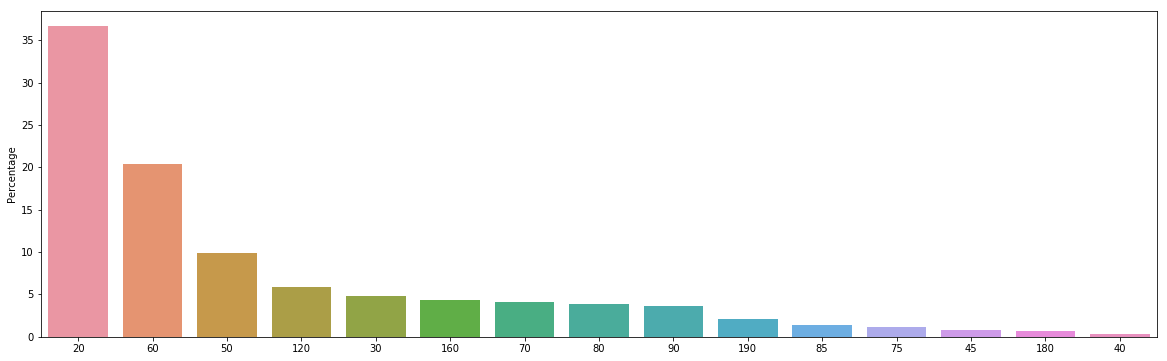

Variable: MSZoning
Mode:  RL


,Frequency,Percentage
RL,1145,78.91
RM,218,15.02
FV,62,4.27
RH,16,1.10
C (all),10,0.69


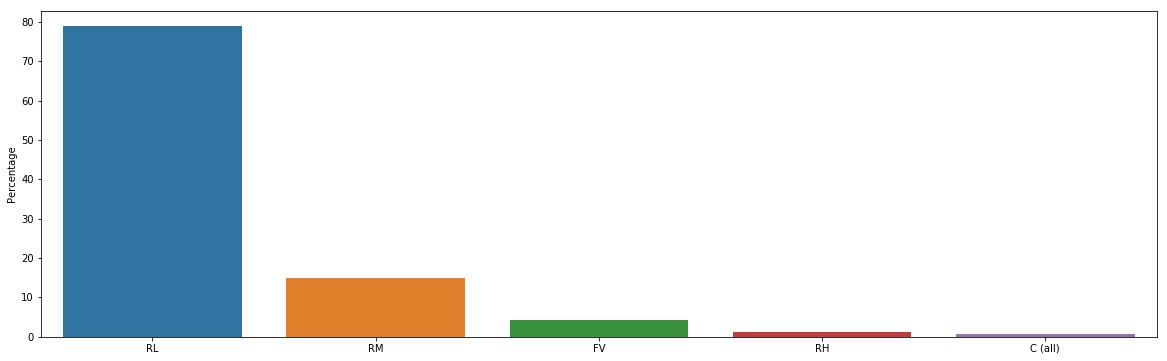

Variable: Street
Mode:  Pave


,Frequency,Percentage
Pave,1445,99.59
Grvl,6,0.41


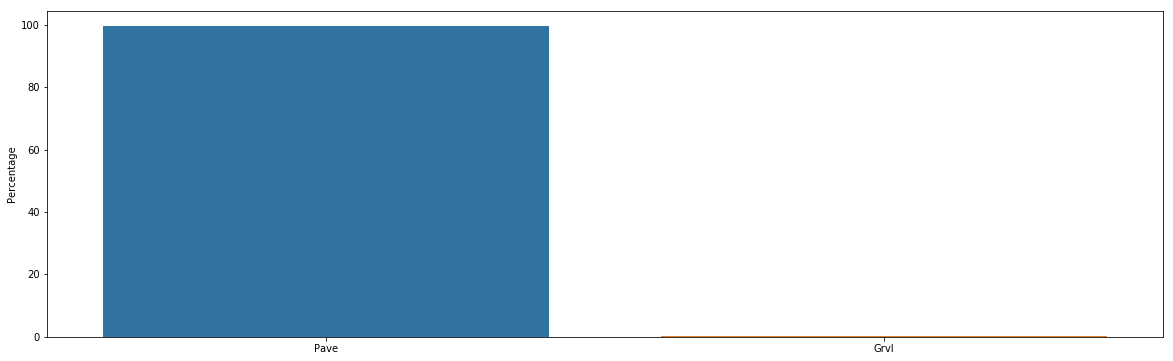

Variable: Alley
Mode:  None


,Frequency,Percentage
None,1361,93.80
Grvl,50,3.45
Pave,40,2.76


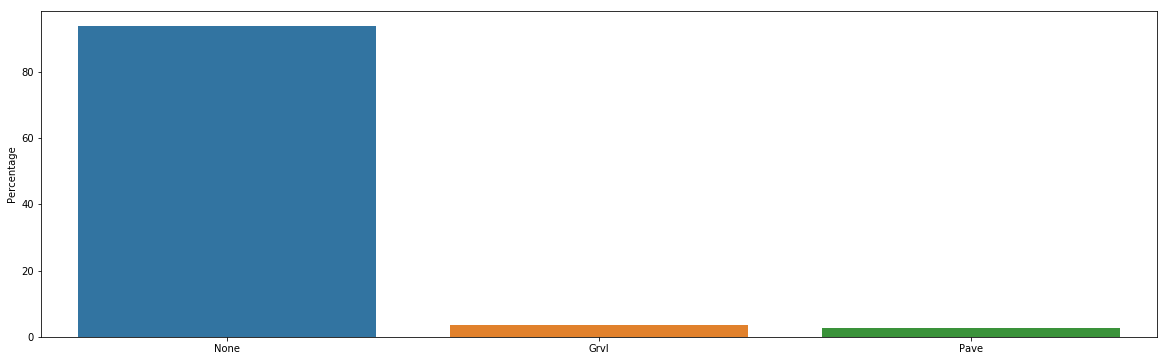

Variable: LandContour
Mode:  Lvl


,Frequency,Percentage
Lvl,1302,89.73
Bnk,63,4.34
HLS,50,3.45
Low,36,2.48


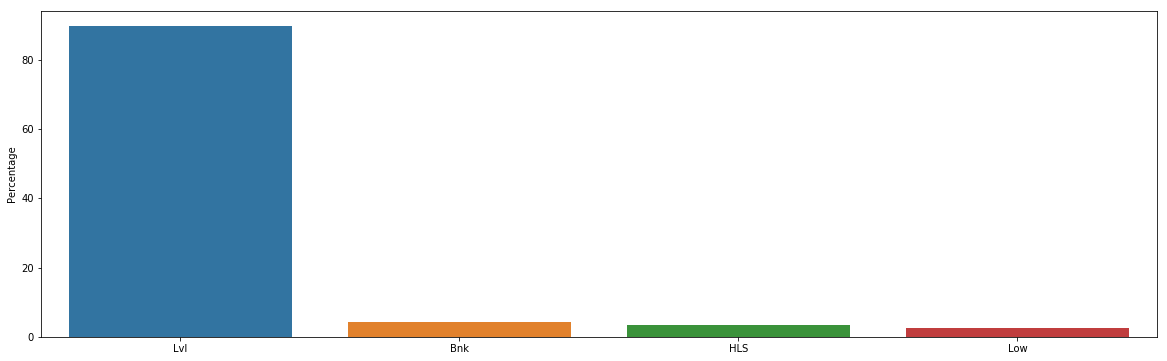

Variable: LotConfig
Mode:  Inside


,Frequency,Percentage
Inside,1045,72.02
Corner,262,18.06
CulDSac,93,6.41
FR2,47,3.24
FR3,4,0.28


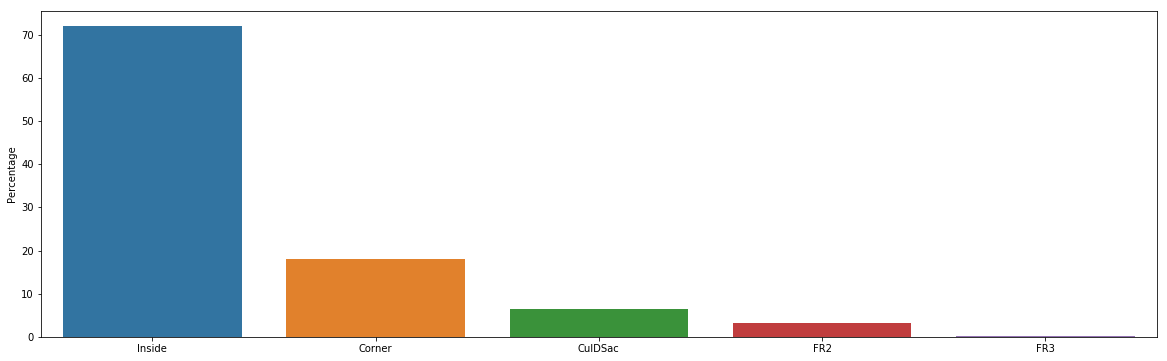

Variable: Neighborhood
Mode:  NAmes


,Frequency,Percentage
NAmes,225,15.51
CollgCr,149,10.27
OldTown,113,7.79
Edwards,100,6.89
Somerst,83,5.72
Gilbert,78,5.38
NridgHt,76,5.24
Sawyer,74,5.10
NWAmes,73,5.03
BrkSide,58,4.00


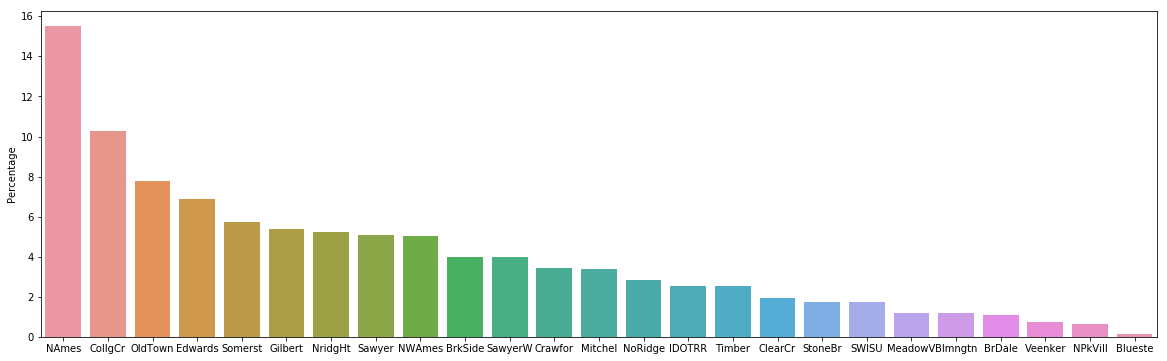

Variable: Condition1
Mode:  Norm


,Frequency,Percentage
Norm,1251,86.22
Feedr,81,5.58
Artery,48,3.31
RRAn,26,1.79
PosN,19,1.31
RRAe,11,0.76
PosA,8,0.55
RRNn,5,0.34
RRNe,2,0.14


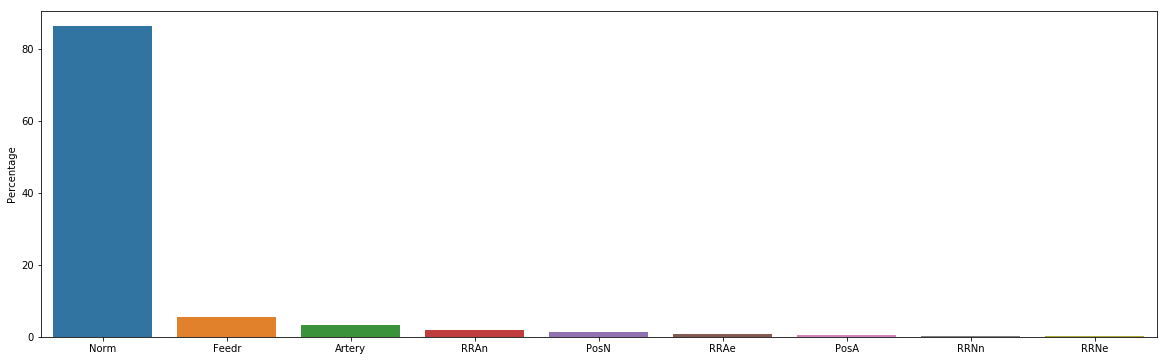

Variable: Condition2
Mode:  Norm


,Frequency,Percentage
Norm,1436,98.97
Feedr,6,0.41
RRNn,2,0.14
PosN,2,0.14
Artery,2,0.14
RRAe,1,0.07
PosA,1,0.07
RRAn,1,0.07


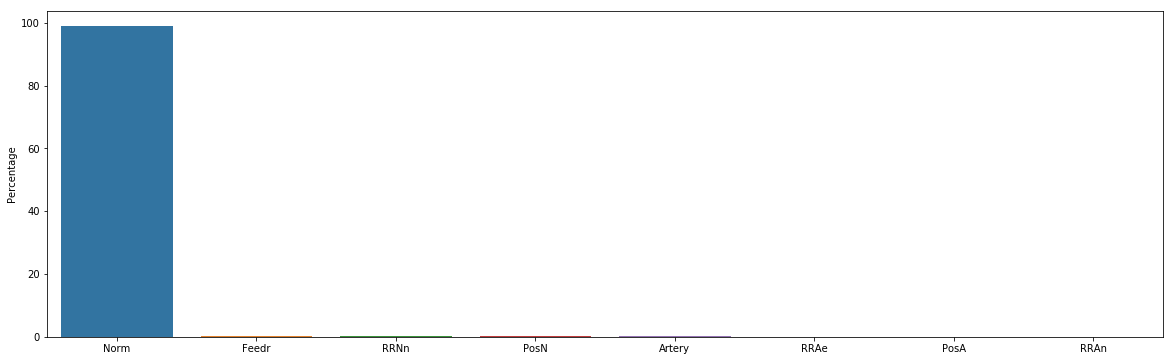

Variable: BldgType
Mode:  1Fam


,Frequency,Percentage
1Fam,1212,83.53
TwnhsE,113,7.79
Duplex,52,3.58
Twnhs,43,2.96
2fmCon,31,2.14


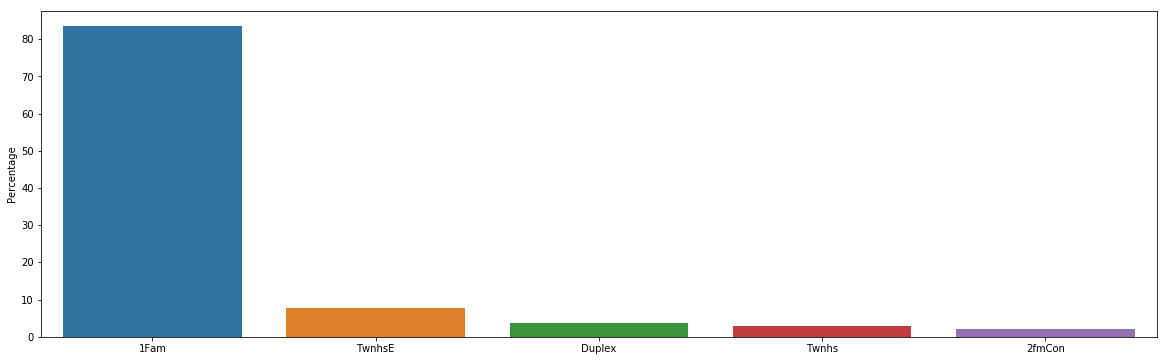

Variable: HouseStyle
Mode:  1Story


,Frequency,Percentage
1Story,721,49.69
2Story,442,30.46
1.5Fin,154,10.61
SLvl,64,4.41
SFoyer,37,2.55
1.5Unf,14,0.96
2.5Unf,11,0.76
2.5Fin,8,0.55


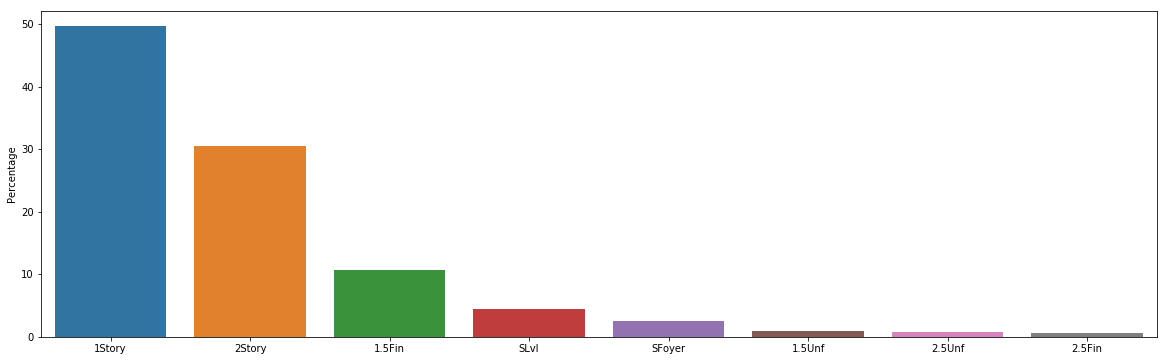

Variable: RoofStyle
Mode:  Gable


,Frequency,Percentage
Gable,1133,78.08
Hip,285,19.64
Flat,13,0.90
Gambrel,11,0.76
Mansard,7,0.48
Shed,2,0.14


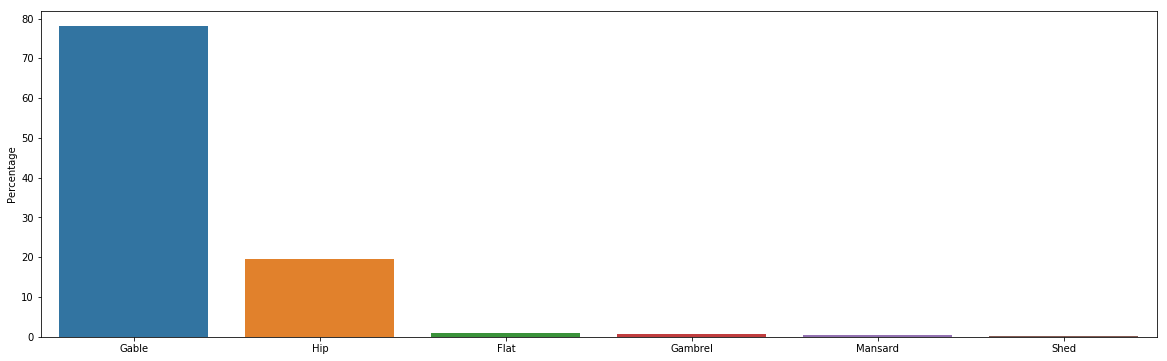

Variable: RoofMatl
Mode:  CompShg


,Frequency,Percentage
CompShg,1425,98.21
Tar&Grv,11,0.76
WdShngl,6,0.41
WdShake,5,0.34
Metal,1,0.07
Membran,1,0.07
Roll,1,0.07
ClyTile,1,0.07


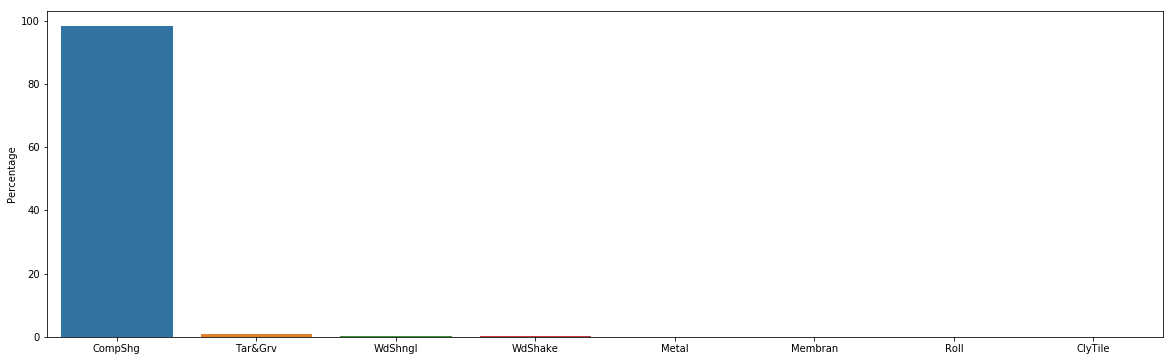

Variable: Exterior1st
Mode:  VinylSd


,Frequency,Percentage
VinylSd,509,35.08
HdBoard,222,15.30
MetalSd,220,15.16
Wd Sdng,205,14.13
Plywood,108,7.44
CemntBd,59,4.07
BrkFace,50,3.45
WdShing,26,1.79
Stucco,25,1.72
AsbShng,20,1.38


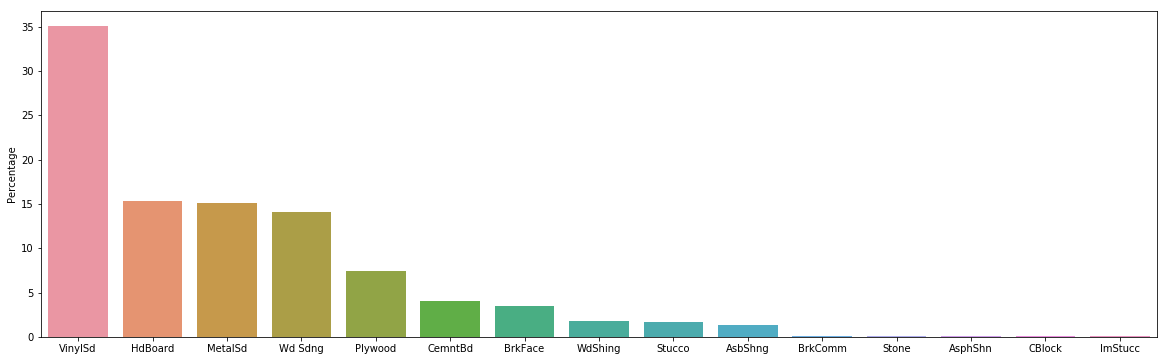

Variable: Exterior2nd
Mode:  VinylSd


,Frequency,Percentage
VinylSd,498,34.32
MetalSd,214,14.75
HdBoard,207,14.27
Wd Sdng,197,13.58
Plywood,142,9.79
CmentBd,58,4.00
Wd Shng,38,2.62
Stucco,26,1.79
BrkFace,25,1.72
AsbShng,20,1.38


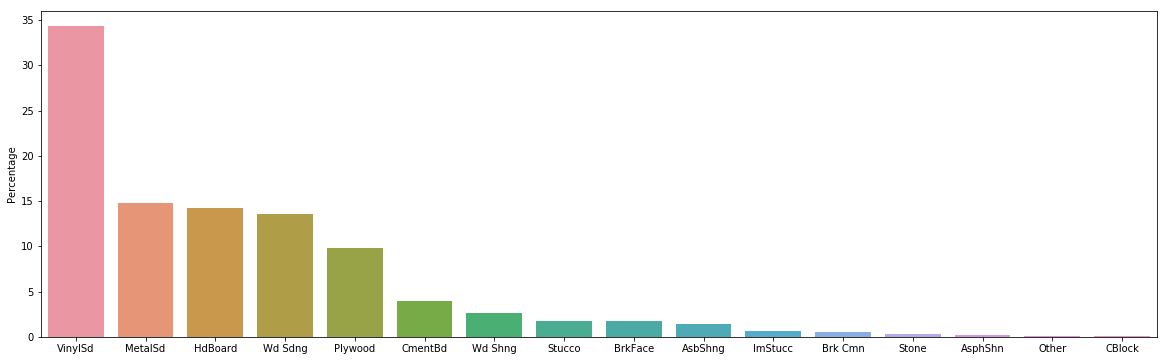

Variable: MasVnrType
Mode:  None


,Frequency,Percentage
None,863,59.48
BrkFace,445,30.67
Stone,128,8.82
BrkCmn,15,1.03


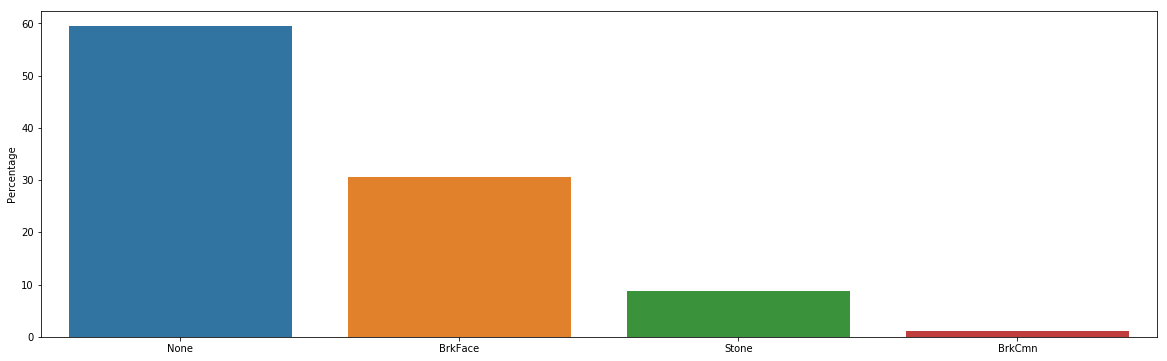

Variable: Foundation
Mode:  PConc


,Frequency,Percentage
PConc,638,43.97
CBlock,634,43.69
BrkTil,146,10.06
Slab,24,1.65
Stone,6,0.41
Wood,3,0.21


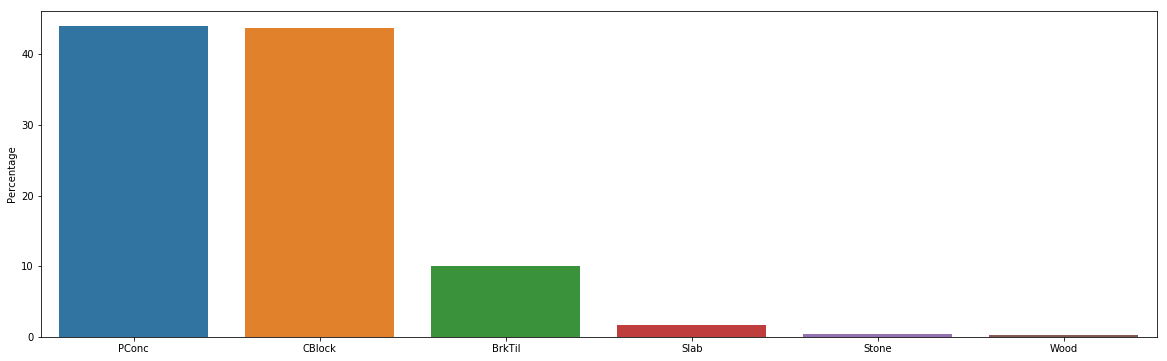

Variable: BsmtFinType1
Mode:  Unf


,Frequency,Percentage
Unf,427,29.43
GLQ,413,28.46
ALQ,220,15.16
BLQ,148,10.20
Rec,132,9.10
LwQ,74,5.10
None,37,2.55


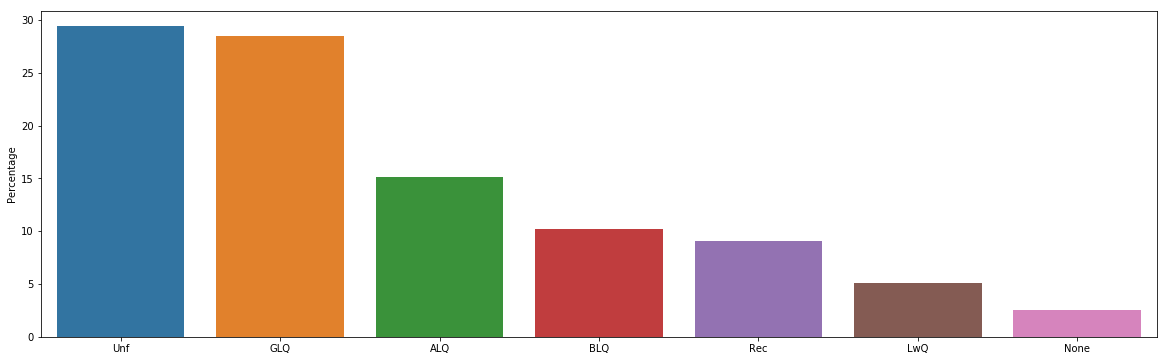

Variable: BsmtFinType2
Mode:  Unf


,Frequency,Percentage
Unf,1247,85.94
Rec,54,3.72
LwQ,46,3.17
None,38,2.62
BLQ,33,2.27
ALQ,19,1.31
GLQ,14,0.96


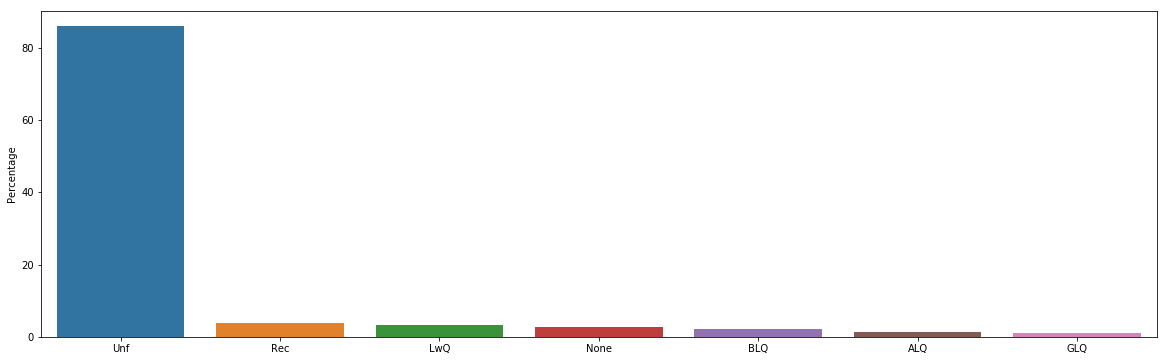

Variable: Heating
Mode:  GasA


,Frequency,Percentage
GasA,1419,97.79
GasW,18,1.24
Grav,7,0.48
Wall,4,0.28
OthW,2,0.14
Floor,1,0.07


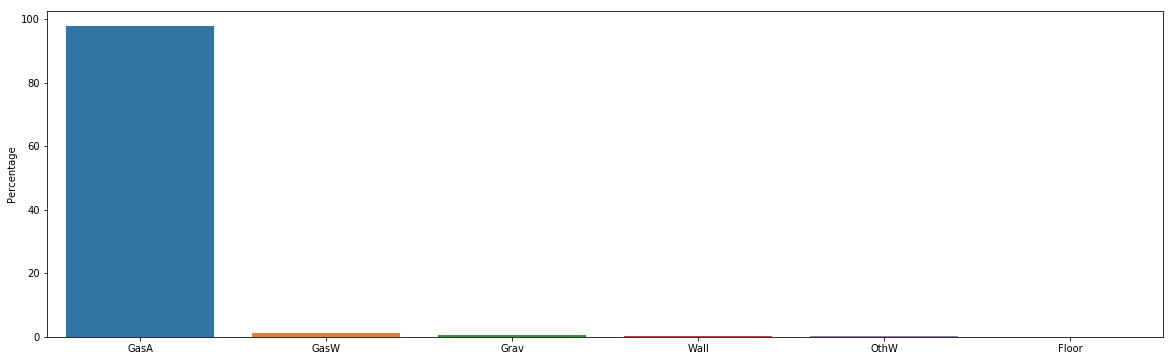

Variable: CentralAir
Mode:  Y


,Frequency,Percentage
Y,1356,93.45
N,95,6.55


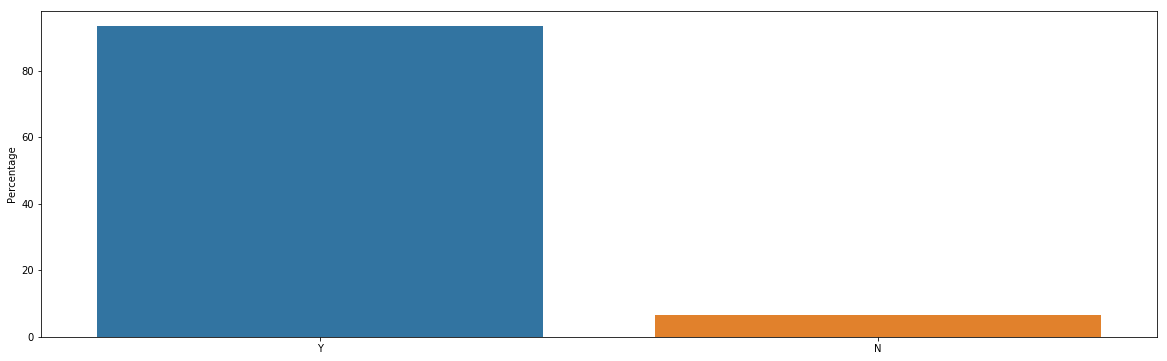

Variable: Electrical
Mode:  SBrkr


,Frequency,Percentage
SBrkr,1326,91.39
FuseA,94,6.48
FuseF,27,1.86
FuseP,3,0.21
Mix,1,0.07


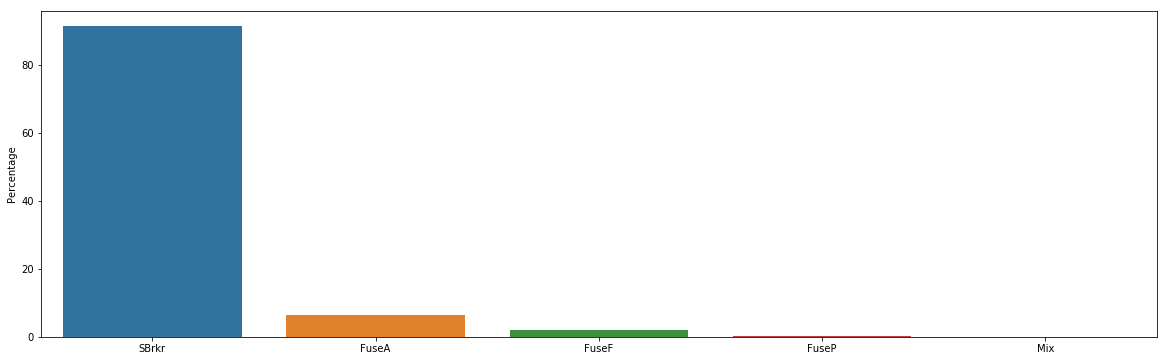

Variable: GarageType
Mode:  Attchd


,Frequency,Percentage
Attchd,863,59.48
Detchd,387,26.67
BuiltIn,86,5.93
None,81,5.58
Basment,19,1.31
CarPort,9,0.62
2Types,6,0.41


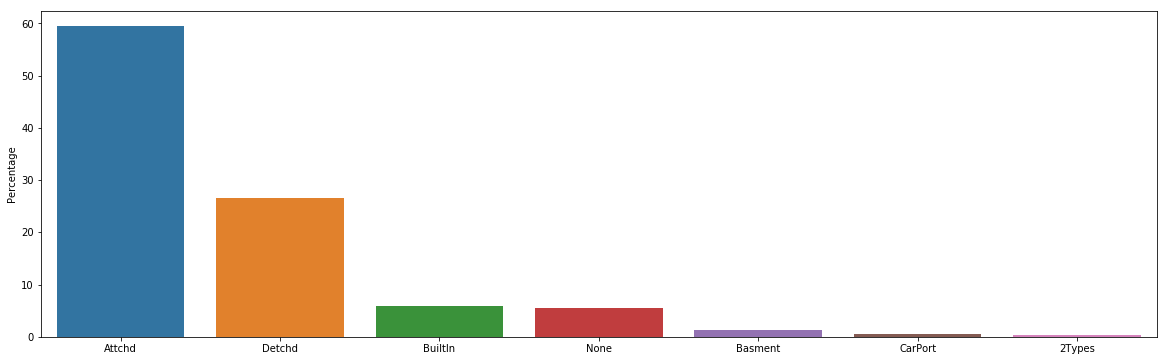

Variable: PavedDrive
Mode:  Y


,Frequency,Percentage
Y,1331,91.73
N,90,6.20
P,30,2.07


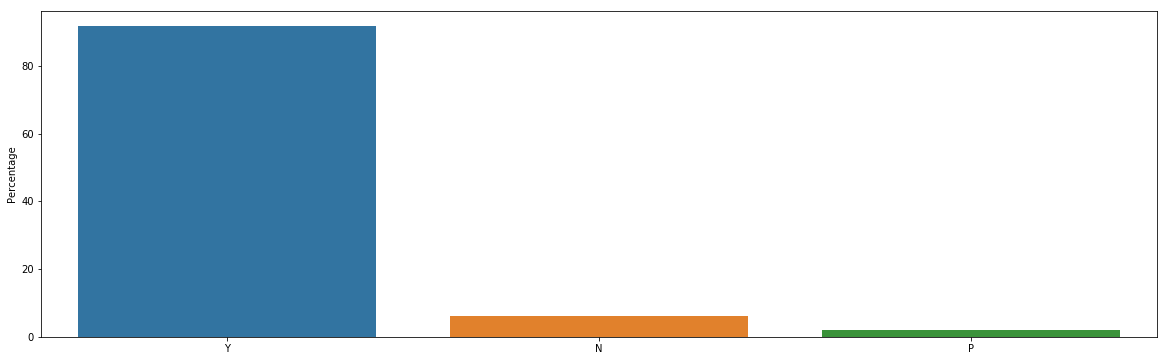

Variable: Fence
Mode:  None


,Frequency,Percentage
None,1170,80.63
MnPrv,157,10.82
GdPrv,59,4.07
GdWo,54,3.72
MnWw,11,0.76


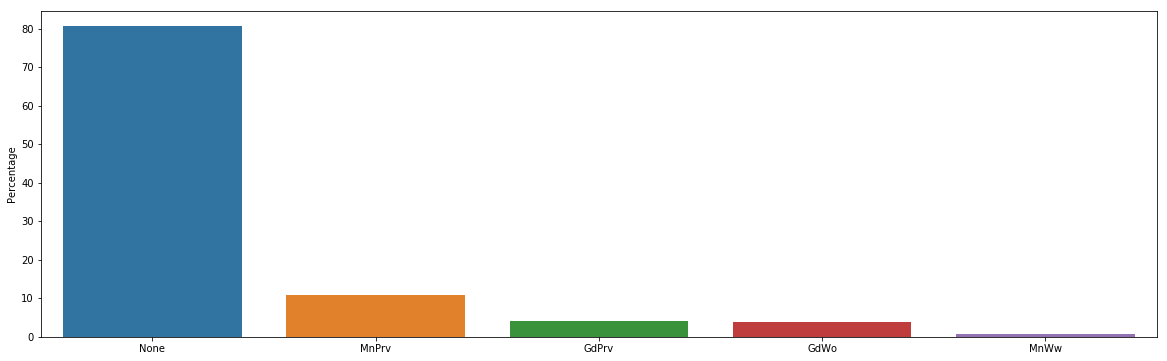

Variable: MiscFeature
Mode:  None


,Frequency,Percentage
None,1397,96.28
Shed,49,3.38
Gar2,2,0.14
Othr,2,0.14
TenC,1,0.07


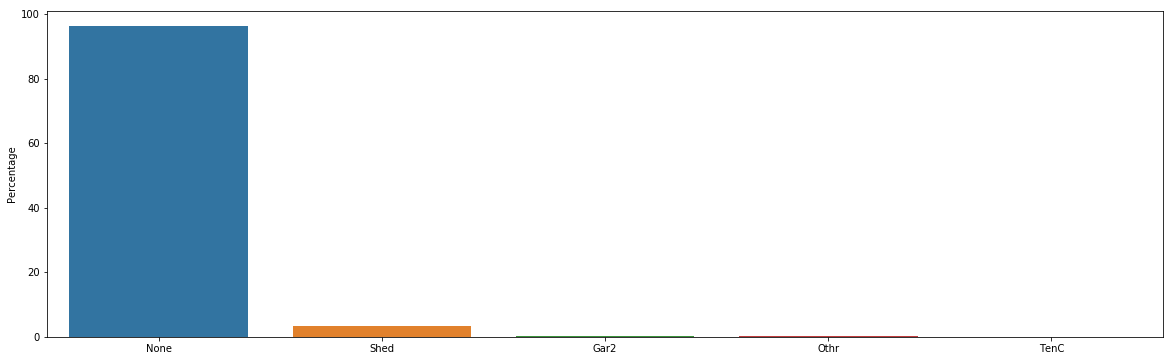

Variable: SaleType
Mode:  WD


,Frequency,Percentage
WD,1261,86.91
New,119,8.20
COD,43,2.96
ConLD,9,0.62
ConLI,5,0.34
ConLw,5,0.34
CWD,4,0.28
Oth,3,0.21
Con,2,0.14


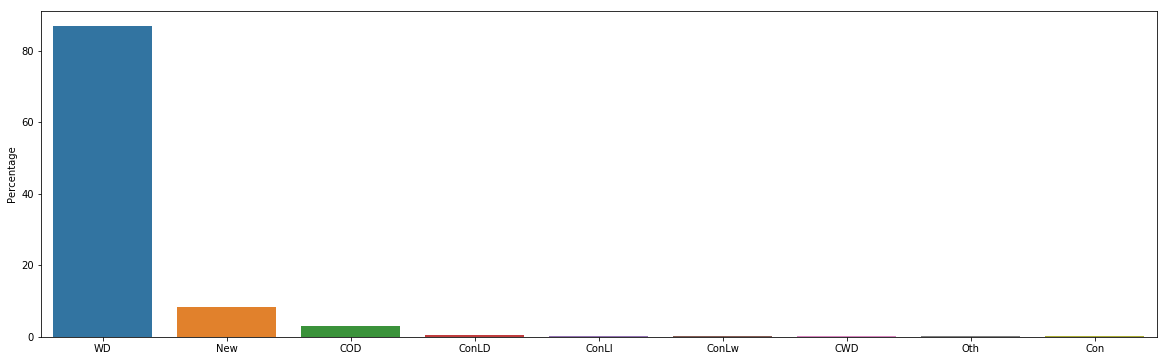

Variable: SaleCondition
Mode:  Normal


,Frequency,Percentage
Normal,1193,82.22
Partial,122,8.41
Abnorml,101,6.96
Family,20,1.38
Alloca,11,0.76
AdjLand,4,0.28


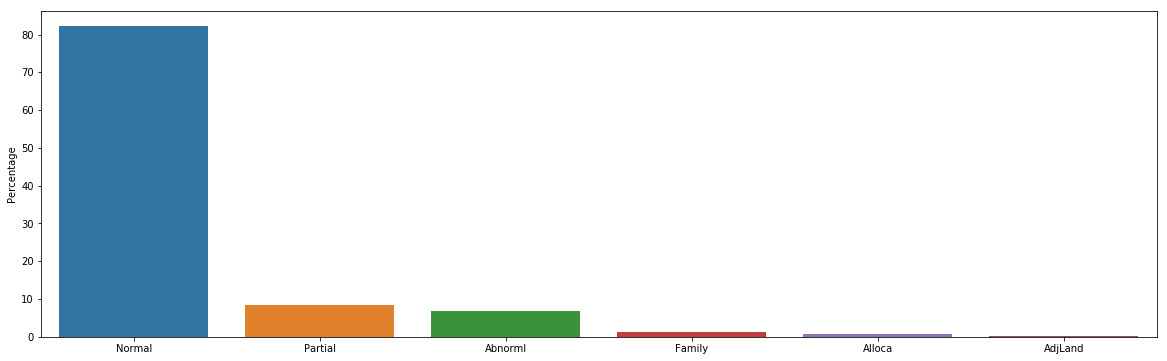

Variable: PoolQC
Mode:  0.0


,Frequency,Percentage
0.0,1444,99.52
4.0,3,0.21
2.0,2,0.14
5.0,2,0.14


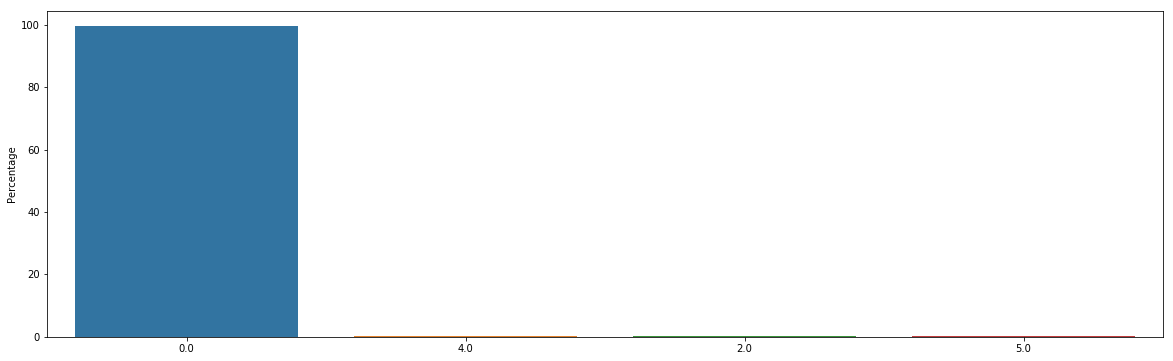

Variable: GarageCond
Mode:  3.0


,Frequency,Percentage
3.0,1317,90.76
0.0,81,5.58
2.0,35,2.41
4.0,9,0.62
1.0,7,0.48
5.0,2,0.14


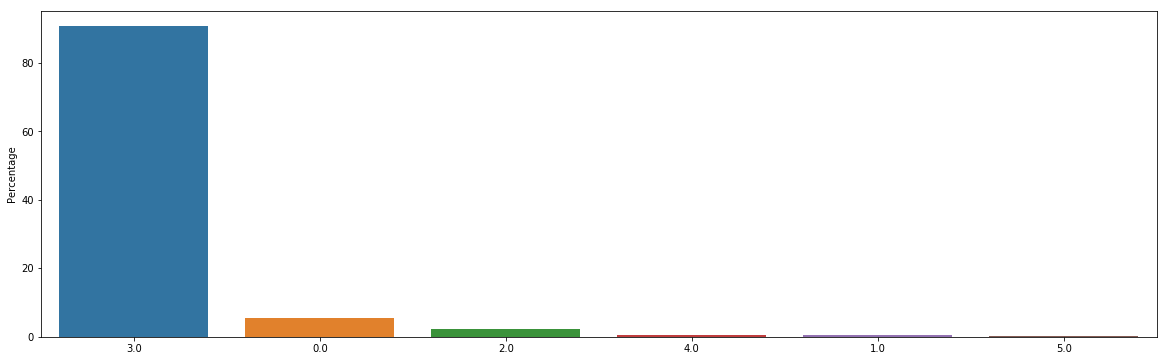

Variable: GarageQual
Mode:  3.0


,Frequency,Percentage
3.0,1302,89.73
0.0,81,5.58
2.0,48,3.31
4.0,14,0.96
1.0,3,0.21
5.0,3,0.21


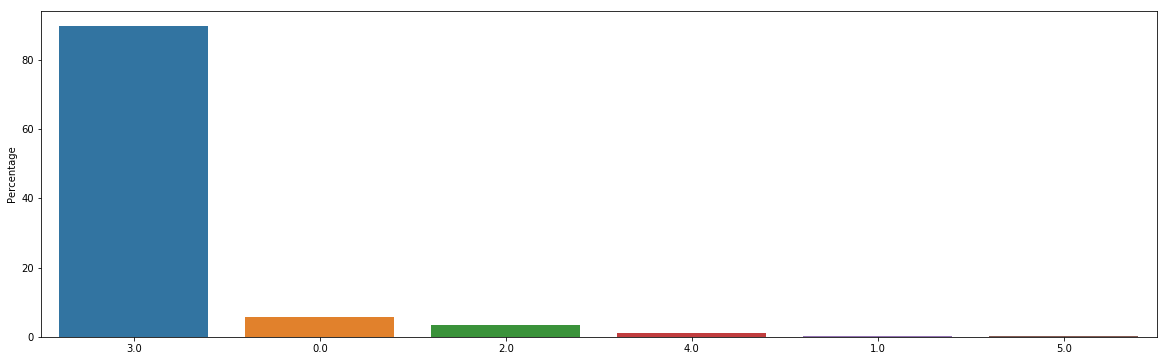

Variable: GarageFinish
Mode:  1.0


,Frequency,Percentage
1.0,605,41.70
2.0,418,28.81
3.0,347,23.91
0.0,81,5.58


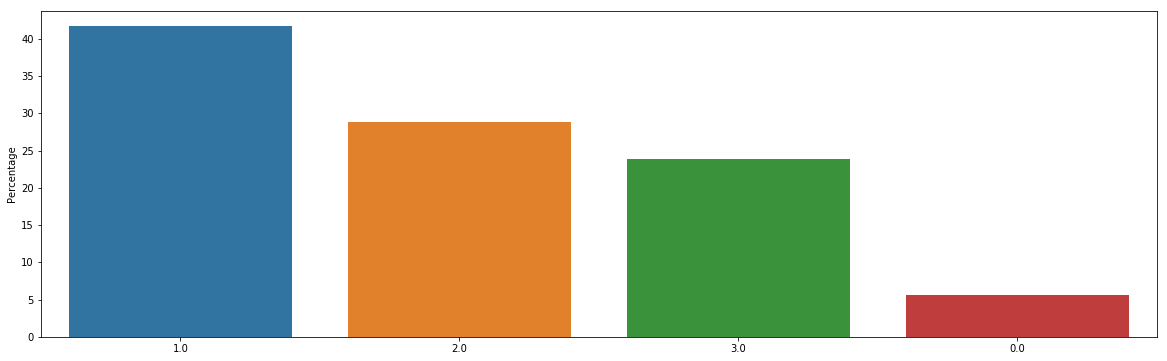

Variable: FireplaceQu
Mode:  0.0


,Frequency,Percentage
0.0,685,47.21
4.0,378,26.05
3.0,311,21.43
2.0,33,2.27
5.0,24,1.65
1.0,20,1.38


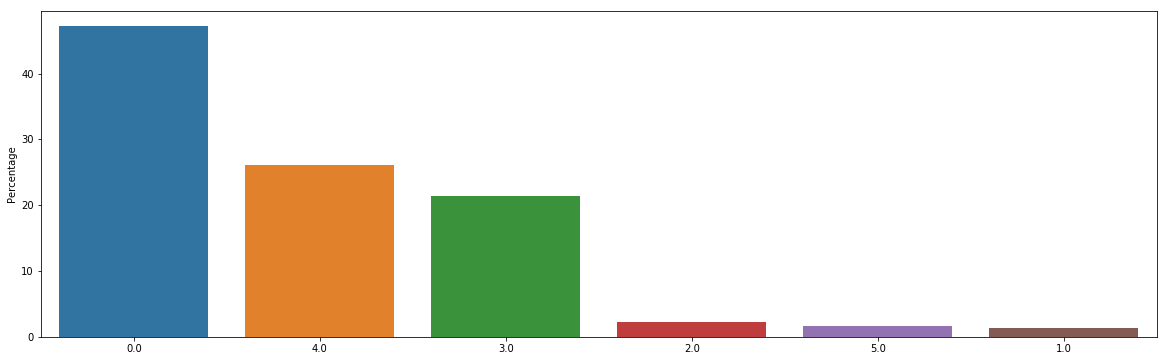

Variable: KitchenQual
Mode:  3.0


,Frequency,Percentage
3,734,50.59
4,579,39.90
5,99,6.82
2,39,2.69


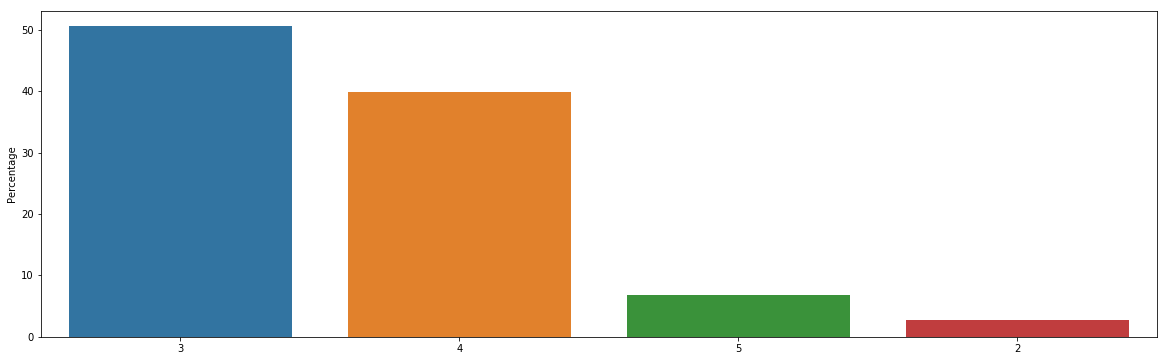

Variable: HeatingQC
Mode:  5.0


,Frequency,Percentage
5,734,50.59
3,427,29.43
4,240,16.54
2,49,3.38
1,1,0.07


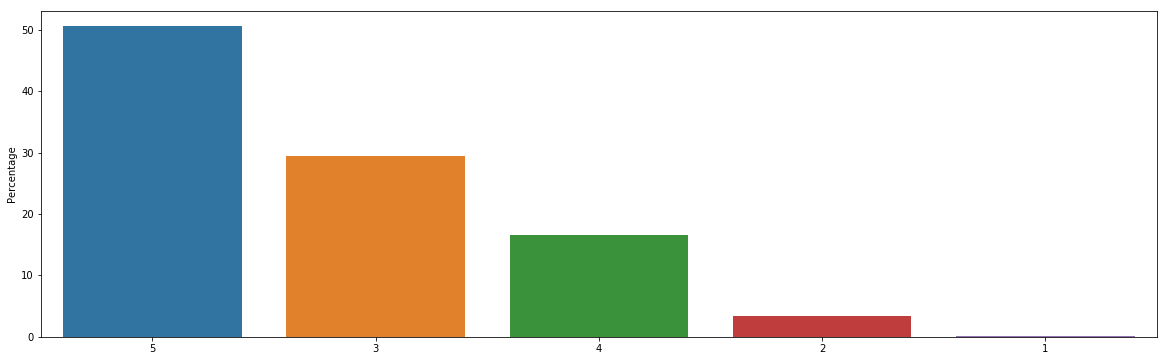

Variable: BsmtExposure
Mode:  1.0


,Frequency,Percentage
1.0,945,65.13
3.0,221,15.23
4.0,133,9.17
2.0,114,7.86
0.0,38,2.62


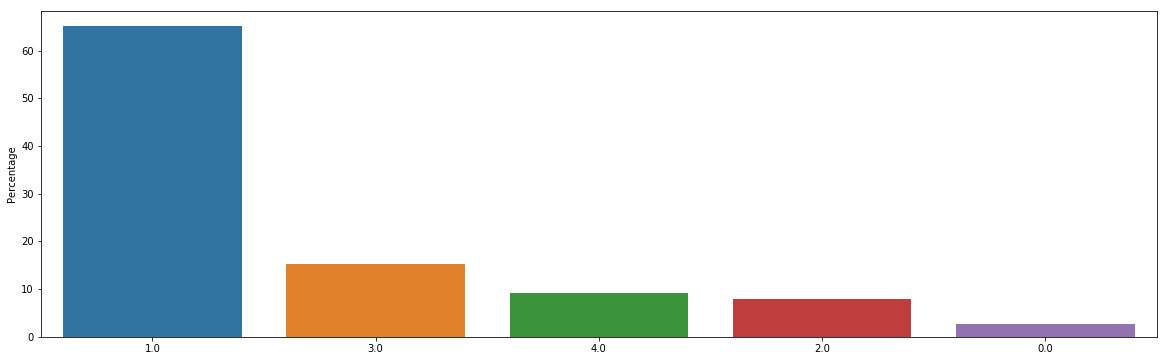

Variable: BsmtCond
Mode:  3.0


,Frequency,Percentage
3.0,1303,89.80
4.0,64,4.41
2.0,45,3.10
0.0,37,2.55
1.0,2,0.14


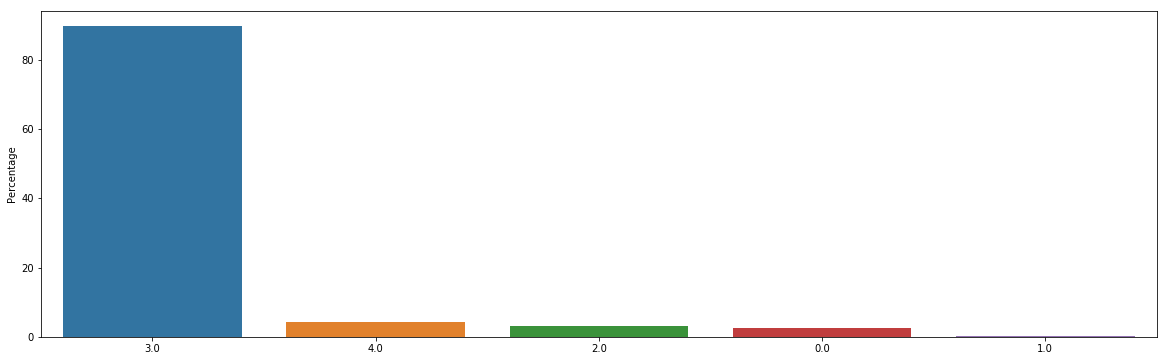

Variable: BsmtQual
Mode:  3.0


,Frequency,Percentage
3.0,648,44.66
4.0,611,42.11
5.0,120,8.27
0.0,37,2.55
2.0,35,2.41


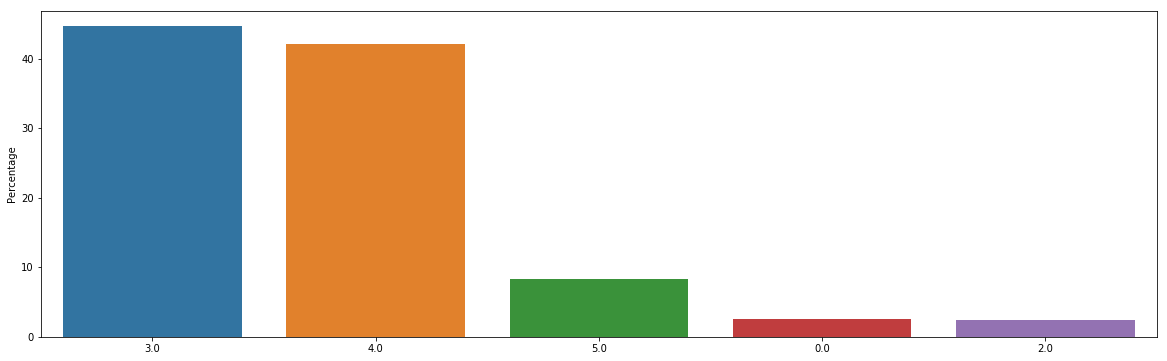

Variable: ExterCond
Mode:  3.0


,Frequency,Percentage
3,1273,87.73
4,146,10.06
2,28,1.93
5,3,0.21
1,1,0.07


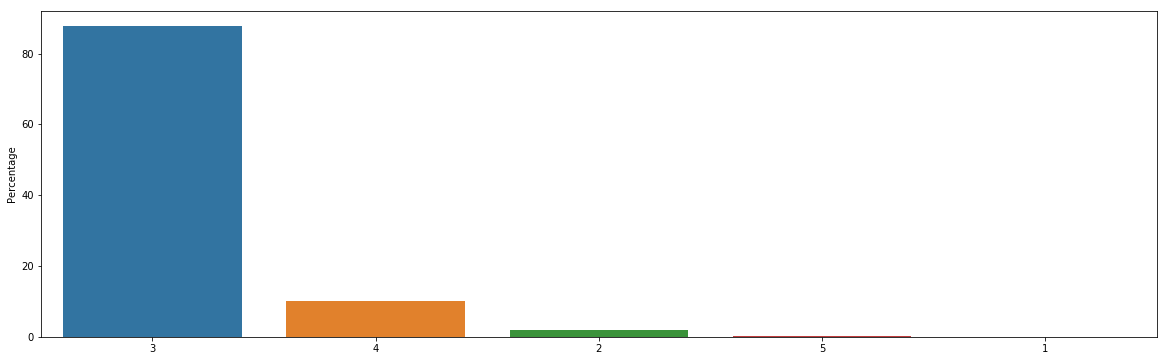

Variable: ExterQual
Mode:  3.0


,Frequency,Percentage
3,905,62.37
4,481,33.15
5,51,3.51
2,14,0.96


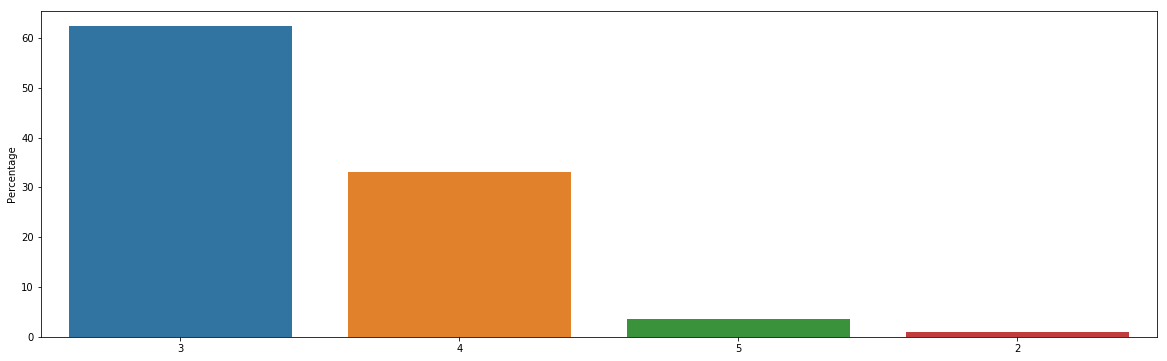

Variable: LandSlope
Mode:  3.0


,Frequency,Percentage
3,1373,94.62
2,65,4.48
1,13,0.90


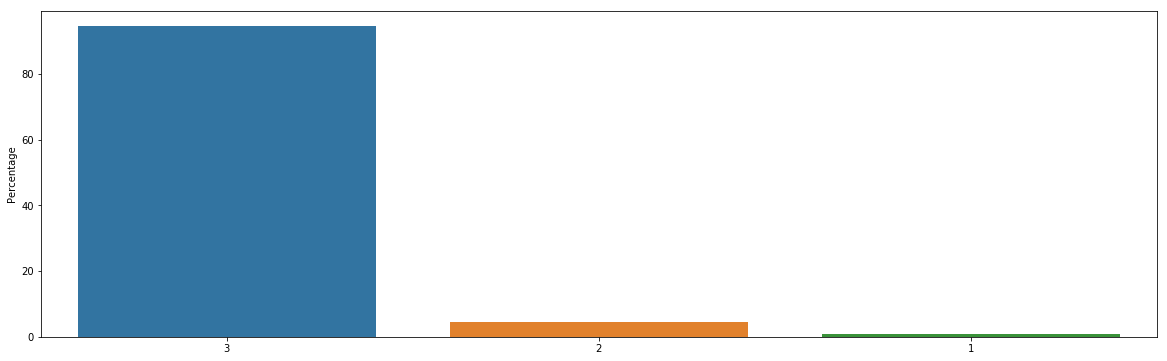

Variable: Utilities
Mode:  4.0


,Frequency,Percentage
4,1450,99.93
2,1,0.07


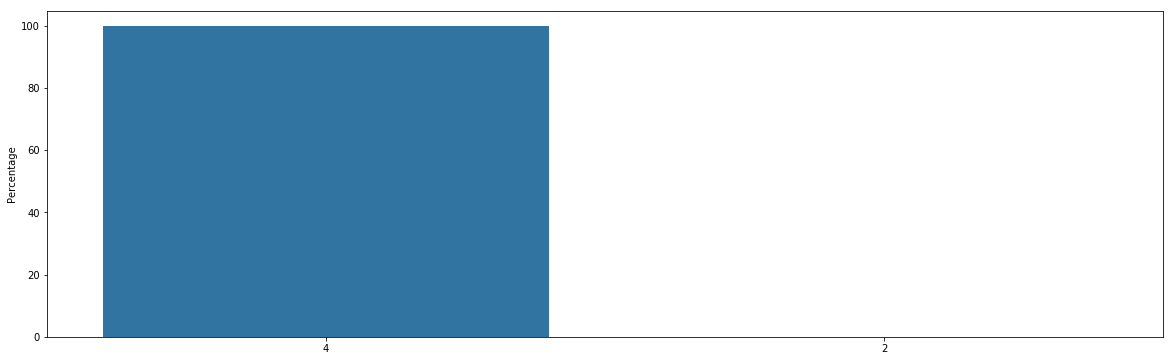

Variable: LotShape
Mode:  4.0


,Frequency,Percentage
4,918,63.27
3,482,33.22
2,41,2.83
1,10,0.69


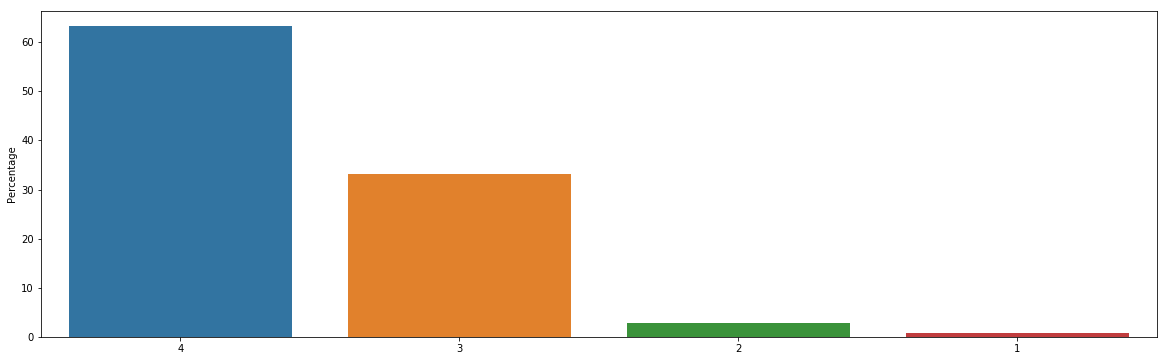

Variable: Functional
Mode:  8.0


,Frequency,Percentage
8,1352,93.18
6,34,2.34
7,31,2.14
5,15,1.03
4,13,0.90
3,5,0.34
2,1,0.07


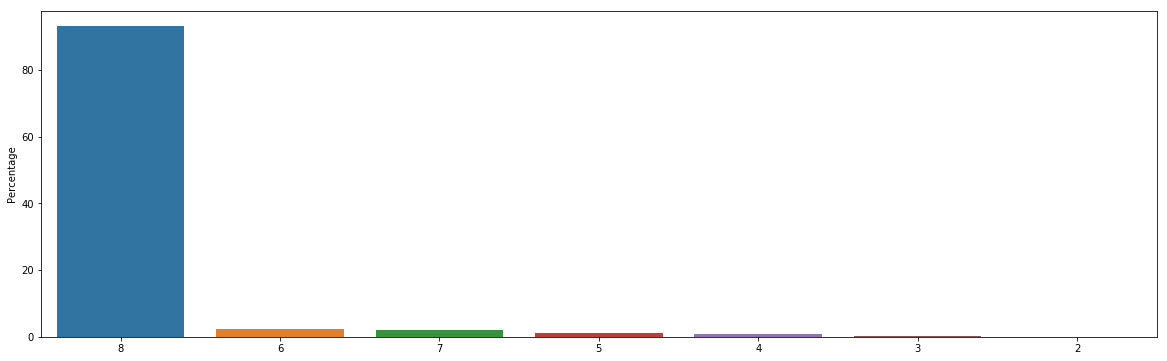

Variable: OverallQual
Mode:  5.0


,Frequency,Percentage
5,396,27.29
6,372,25.64
7,315,21.71
8,167,11.51
4,116,7.99
9,43,2.96
3,20,1.38
10,17,1.17
2,3,0.21
1,2,0.14


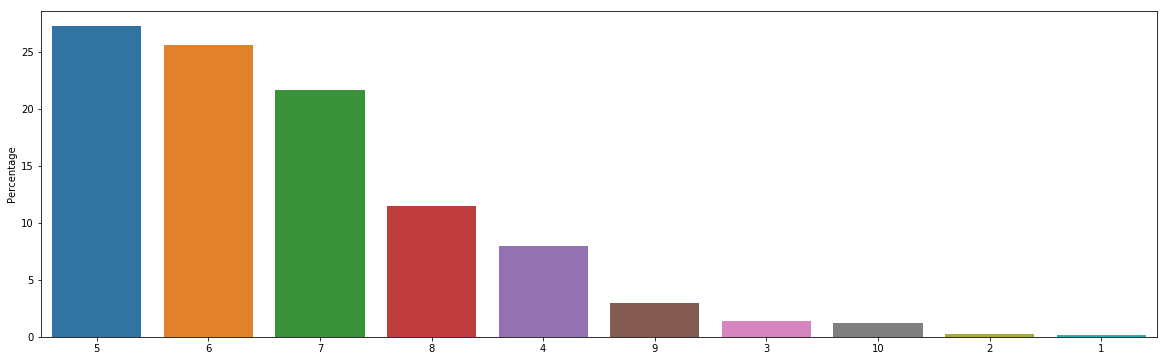

Variable: OverallCond
Mode:  5.0


,Frequency,Percentage
5,814,56.10
6,251,17.30
7,205,14.13
8,72,4.96
4,57,3.93
3,24,1.65
9,22,1.52
2,5,0.34
1,1,0.07


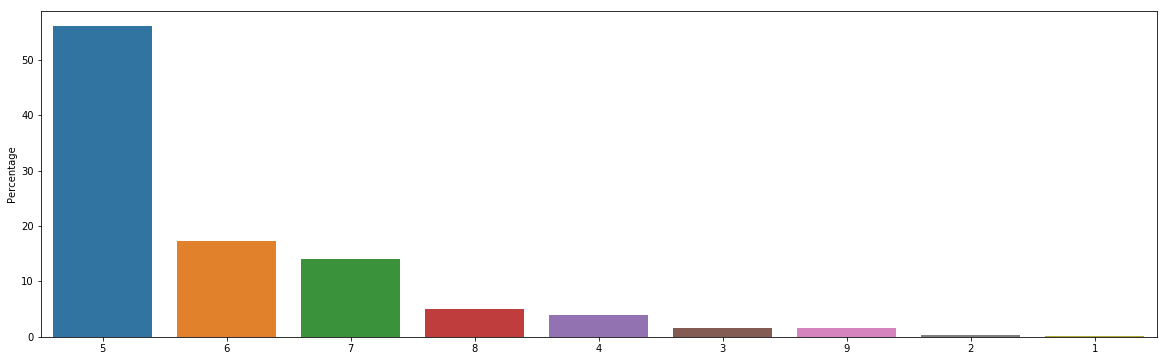

In [20]:
for var in cat_variables: 
    print(f'Variable: {var}')
    print('Mode: ',data.mode()[var][0]) # Mode
    stats_df=pd.DataFrame(columns=['Frequency','Percentage']) # Creating dataframe with number and percentage of occurences
    stats_df['Frequency']=data[var].value_counts() # Calculating number of occurences
    stats_df['Percentage']=((stats_df['Frequency']/data[var].count()*100).round(2)) # Calculating percentage of occurences
    display(stats_df)
    f, ax = plt.subplots(figsize=(20, 6)) # Defining size of bar chart
    vis=sns.barplot(x=stats_df.index, y='Percentage', data=stats_df, order=stats_df['Percentage'].index) # Creating bar chart
    plt.show()

For each numeric variable we will calculate mode, median, coefficient of variation, mean, standard deviation, quartiles, minimum and maximum. We also will make histograms to show distributions of values.

Variable: LotFrontage
Mode:  76.09463722397476
Median:  70.0
Coefficient of variation:  31.58 %
mean     70.779687
std      22.360991
min      21.000000
25%      60.000000
50%      70.000000
75%      79.000000
max     313.000000
Name: LotFrontage, dtype: float64


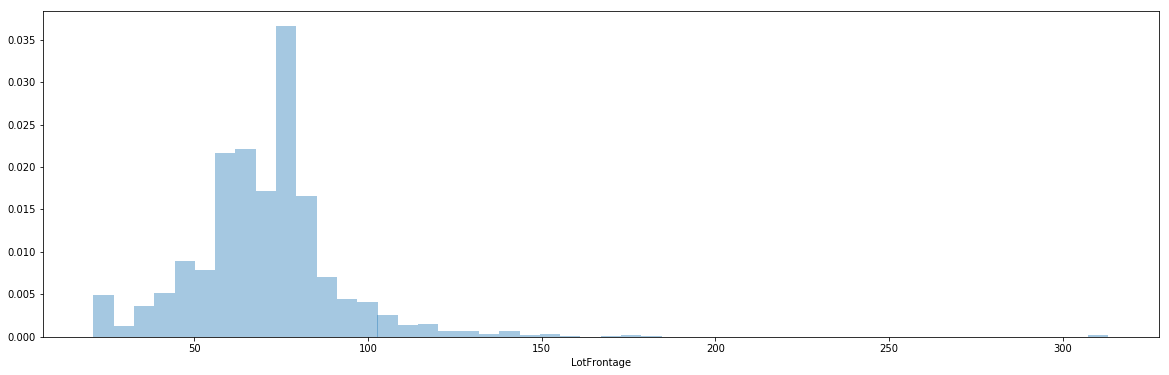

Variable: LotArea
Mode:  7200.0
Median:  9477.0
Coefficient of variation:  95.07 %
mean     10507.808408
std       9992.987081
min       1300.000000
25%       7537.500000
50%       9477.000000
75%      11600.000000
max     215245.000000
Name: LotArea, dtype: float64


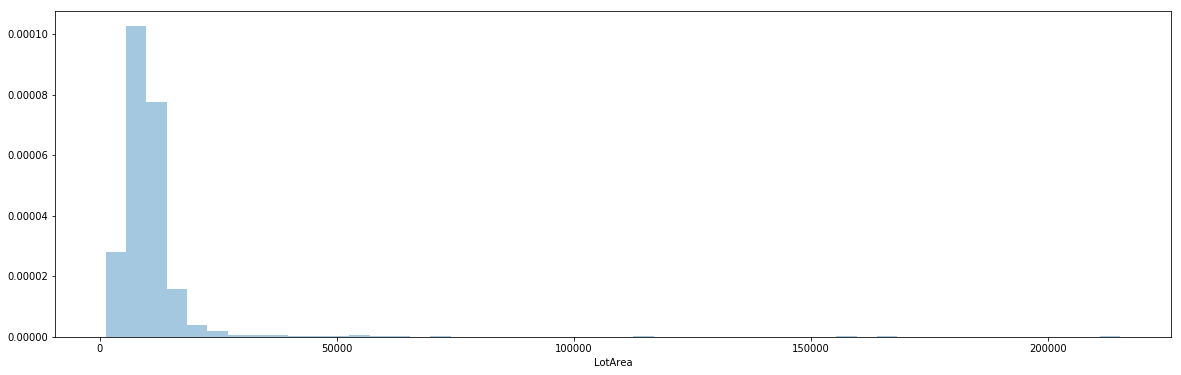

Variable: MasVnrArea
Mode:  0.0
Median:  0.0
Coefficient of variation:  174.49 %
mean     103.75672
std      181.10815
min        0.00000
25%        0.00000
50%        0.00000
75%      166.00000
max     1600.00000
Name: MasVnrArea, dtype: float64


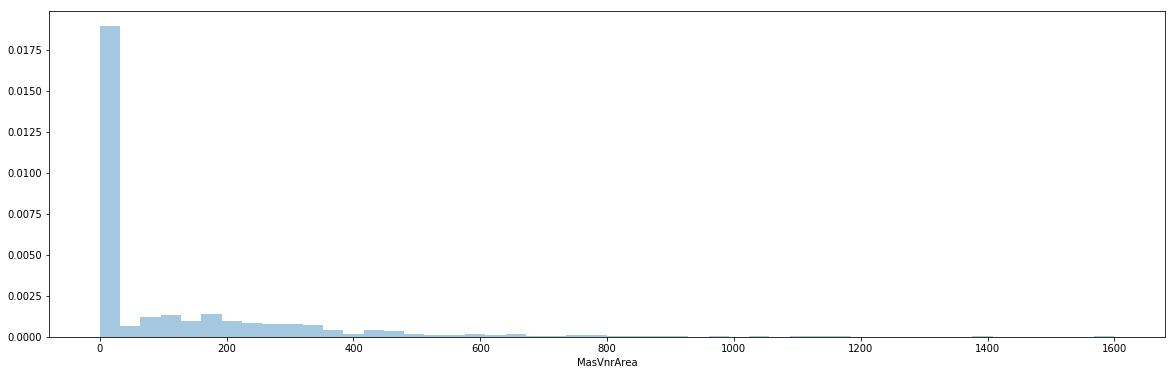

Variable: BsmtFinSF1
Mode:  0.0
Median:  381.0
Coefficient of variation:  102.93 %
mean     442.274983
std      455.369276
min        0.000000
25%        0.000000
50%      381.000000
75%      707.000000
max     5644.000000
Name: BsmtFinSF1, dtype: float64


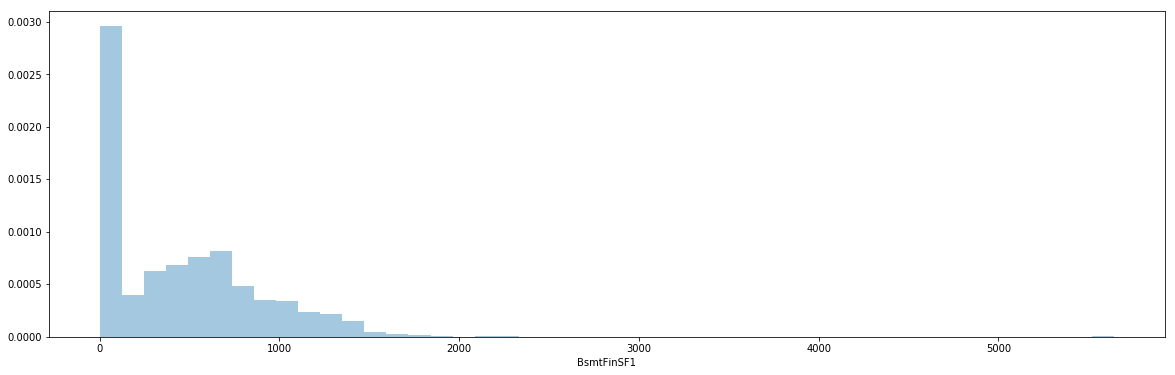

Variable: BsmtFinSF2
Mode:  0.0
Median:  0.0
Coefficient of variation:  345.28 %
mean      46.838043
std      161.777324
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max     1474.000000
Name: BsmtFinSF2, dtype: float64


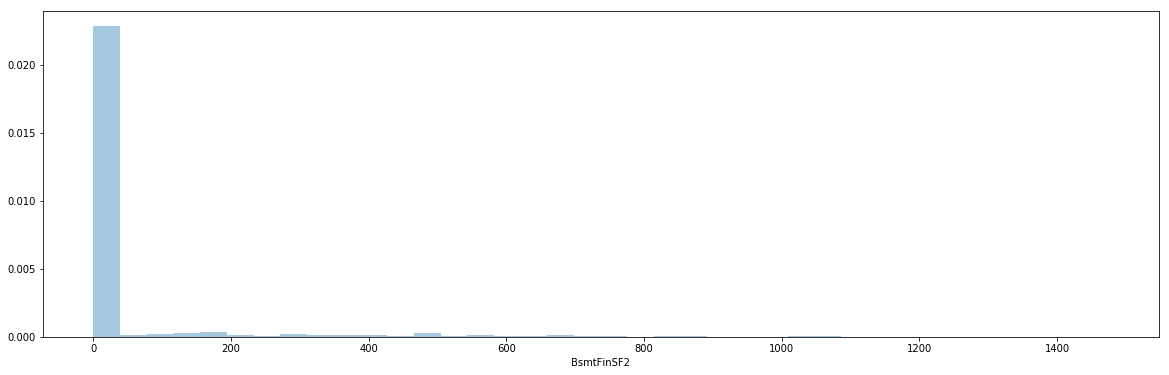

Variable: BsmtUnfSF
Mode:  0.0
Median:  479.0
Coefficient of variation:  77.94 %
mean     567.197105
std      442.209192
min        0.000000
25%      222.000000
50%      479.000000
75%      808.000000
max     2336.000000
Name: BsmtUnfSF, dtype: float64


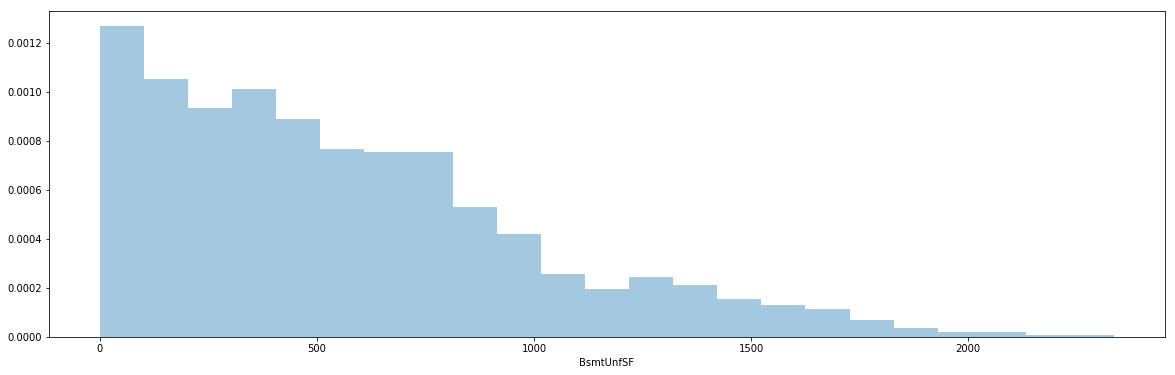

Variable: TotalBsmtSF
Mode:  0.0
Median:  991.0
Coefficient of variation:  41.44 %
mean    1056.310131
std      437.914609
min        0.000000
25%      795.000000
50%      991.000000
75%     1297.500000
max     6110.000000
Name: TotalBsmtSF, dtype: float64


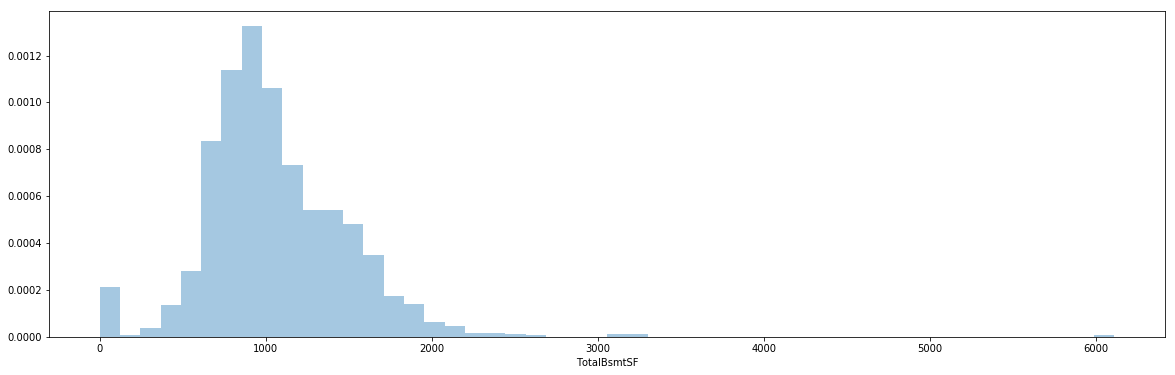

Variable: 1stFlrSF
Mode:  864.0
Median:  1086.0
Coefficient of variation:  33.13 %
mean    1161.551344
std      385.002532
min      334.000000
25%      882.000000
50%     1086.000000
75%     1391.000000
max     4692.000000
Name: 1stFlrSF, dtype: float64


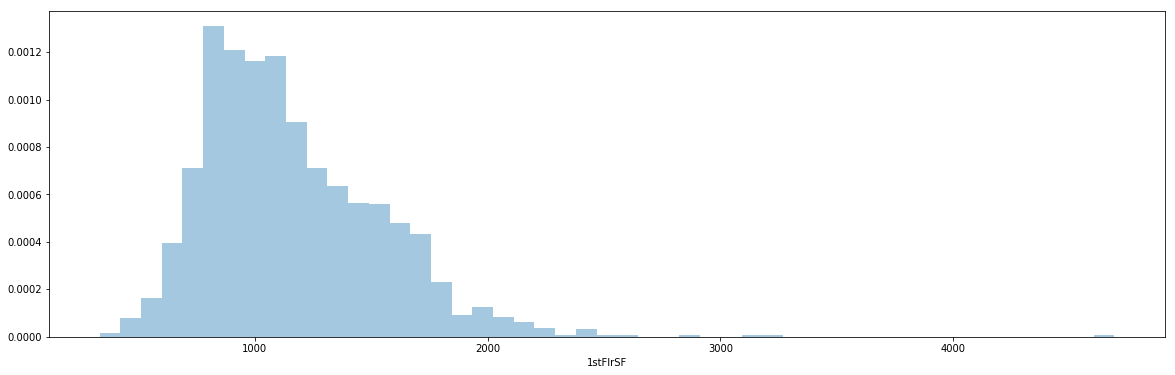

Variable: 2ndFlrSF
Mode:  0.0
Median:  0.0
Coefficient of variation:  125.83 %
mean     346.742247
std      436.453277
min        0.000000
25%        0.000000
50%        0.000000
75%      728.000000
max     2065.000000
Name: 2ndFlrSF, dtype: float64


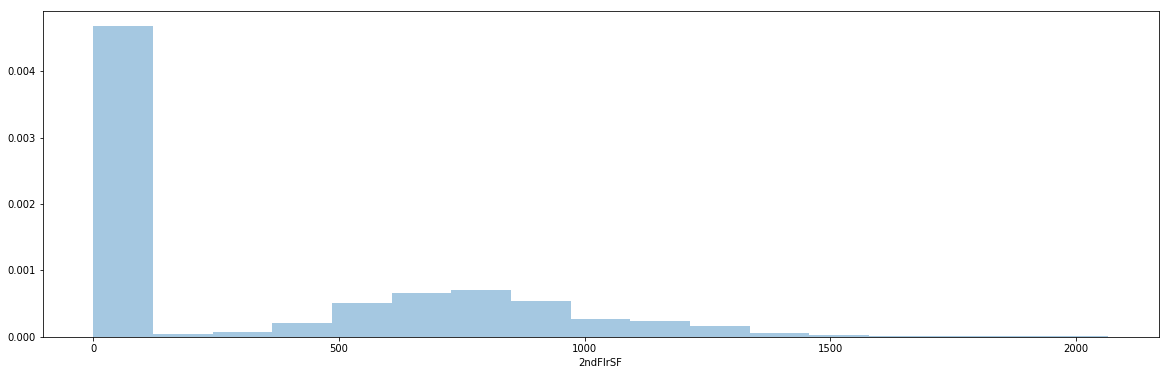

Variable: LowQualFinSF
Mode:  0.0
Median:  0.0
Coefficient of variation:  829.05 %
mean      5.880772
std      48.771560
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max     572.000000
Name: LowQualFinSF, dtype: float64


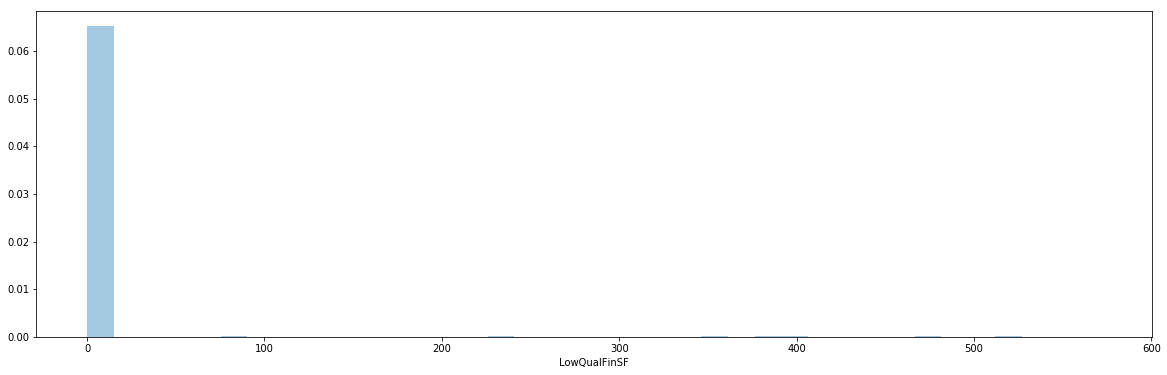

Variable: GrLivArea
Mode:  864.0
Median:  1464.0
Coefficient of variation:  34.71 %
mean    1514.174363
std      525.799521
min      334.000000
25%     1128.000000
50%     1464.000000
75%     1776.000000
max     5642.000000
Name: GrLivArea, dtype: float64


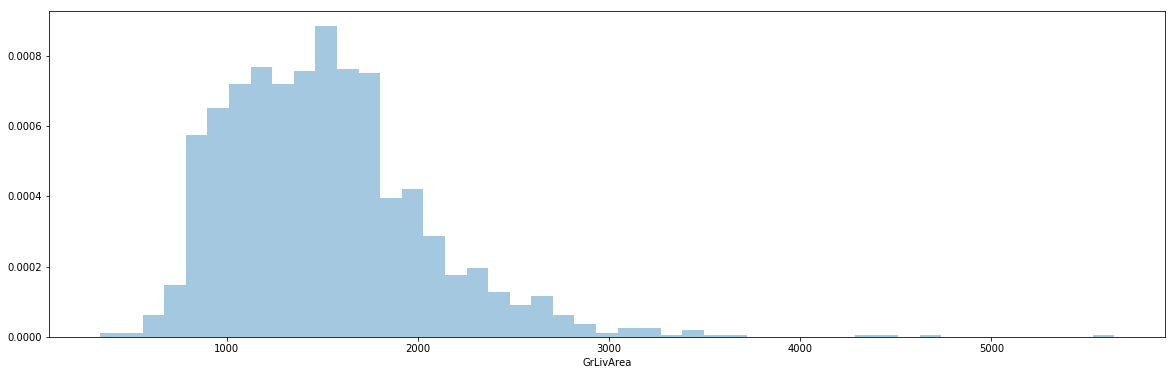

Variable: BsmtFullBath
Mode:  0.0
Median:  0.0
Coefficient of variation:  122.37 %
mean    0.423846
std     0.518842
min     0.000000
25%     0.000000
50%     0.000000
75%     1.000000
max     3.000000
Name: BsmtFullBath, dtype: float64


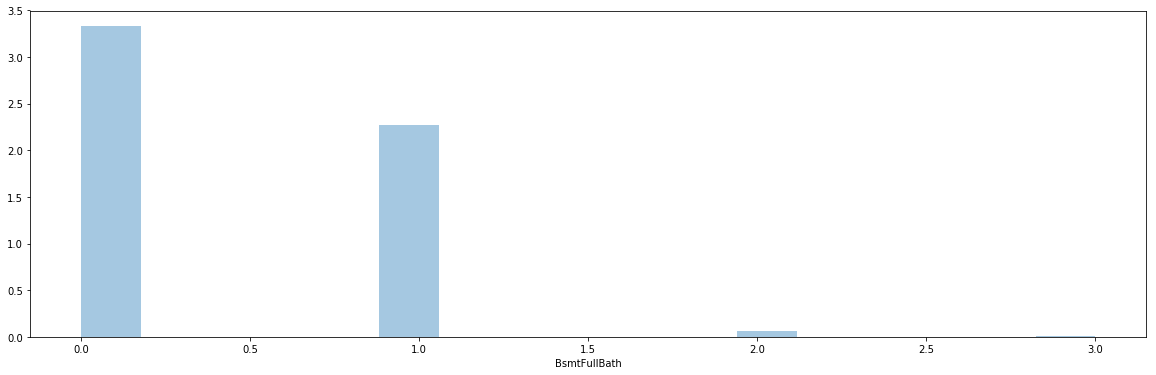

Variable: BsmtHalfBath
Mode:  0.0
Median:  0.0
Coefficient of variation:  413.48 %
mean    0.057891
std     0.239449
min     0.000000
25%     0.000000
50%     0.000000
75%     0.000000
max     2.000000
Name: BsmtHalfBath, dtype: float64


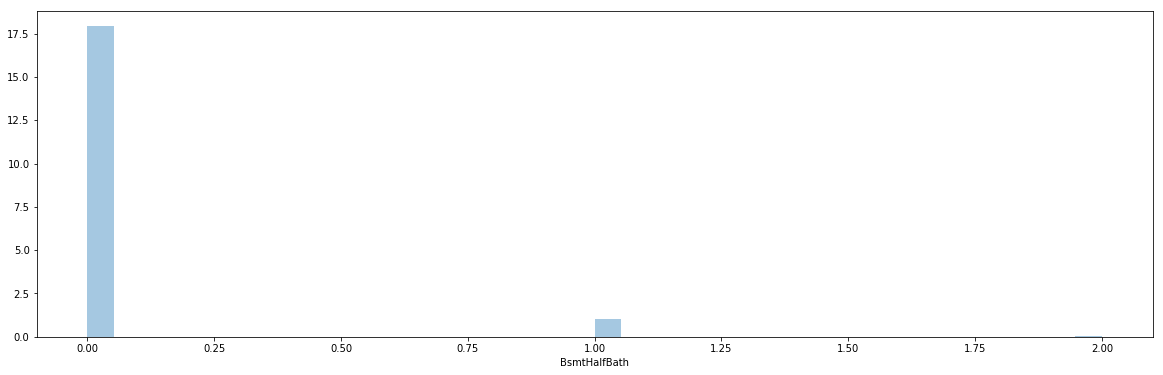

Variable: FullBath
Mode:  2.0
Median:  2.0
Coefficient of variation:  35.21 %
mean    1.562371
std     0.550301
min     0.000000
25%     1.000000
50%     2.000000
75%     2.000000
max     3.000000
Name: FullBath, dtype: float64


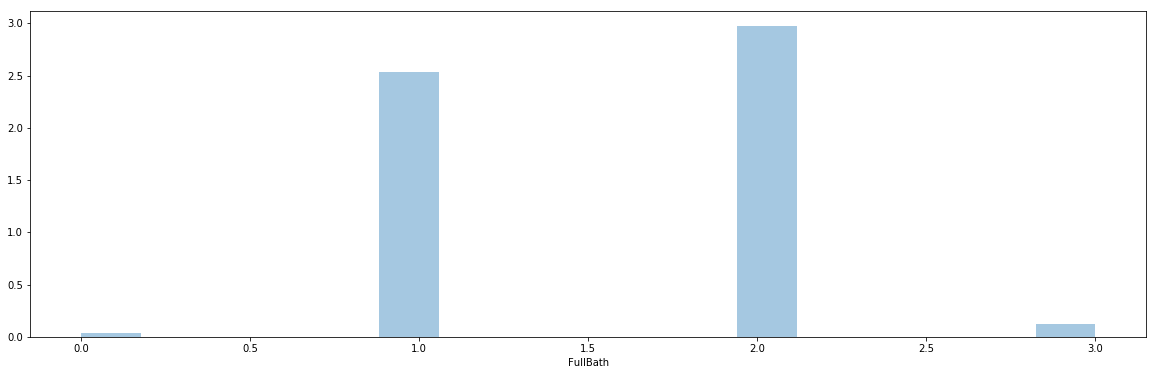

Variable: HalfBath
Mode:  0.0
Median:  0.0
Coefficient of variation:  131.82 %
mean    0.381116
std     0.502574
min     0.000000
25%     0.000000
50%     0.000000
75%     1.000000
max     2.000000
Name: HalfBath, dtype: float64


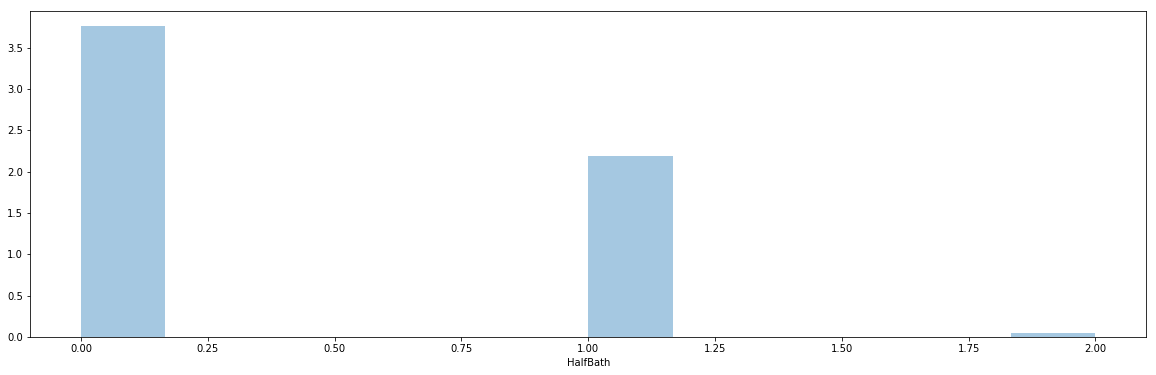

Variable: BedroomAbvGr
Mode:  3.0
Median:  3.0
Coefficient of variation:  28.42 %
mean    2.866988
std     0.815086
min     0.000000
25%     2.000000
50%     3.000000
75%     3.000000
max     8.000000
Name: BedroomAbvGr, dtype: float64


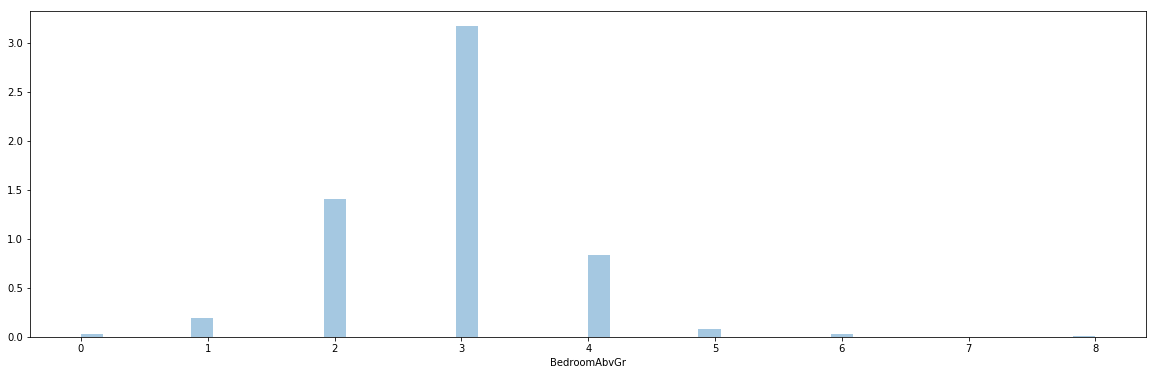

Variable: KitchenAbvGr
Mode:  1.0
Median:  1.0
Coefficient of variation:  20.98 %
mean    1.046175
std     0.219571
min     0.000000
25%     1.000000
50%     1.000000
75%     1.000000
max     3.000000
Name: KitchenAbvGr, dtype: float64


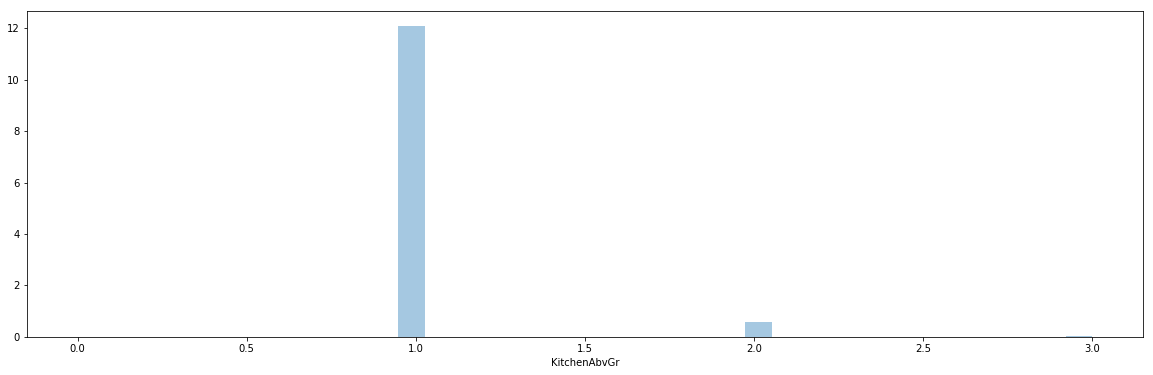

Variable: TotRmsAbvGrd
Mode:  6.0
Median:  6.0
Coefficient of variation:  24.95 %
mean     6.516885
std      1.626576
min      2.000000
25%      5.000000
50%      6.000000
75%      7.000000
max     14.000000
Name: TotRmsAbvGrd, dtype: float64


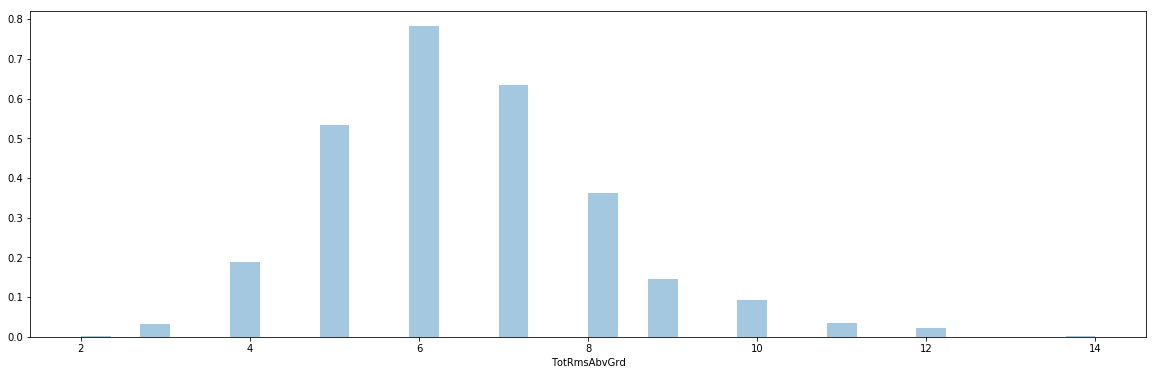

Variable: Fireplaces
Mode:  0.0
Median:  1.0
Coefficient of variation:  104.98 %
mean    0.612681
std     0.643443
min     0.000000
25%     0.000000
50%     1.000000
75%     1.000000
max     3.000000
Name: Fireplaces, dtype: float64


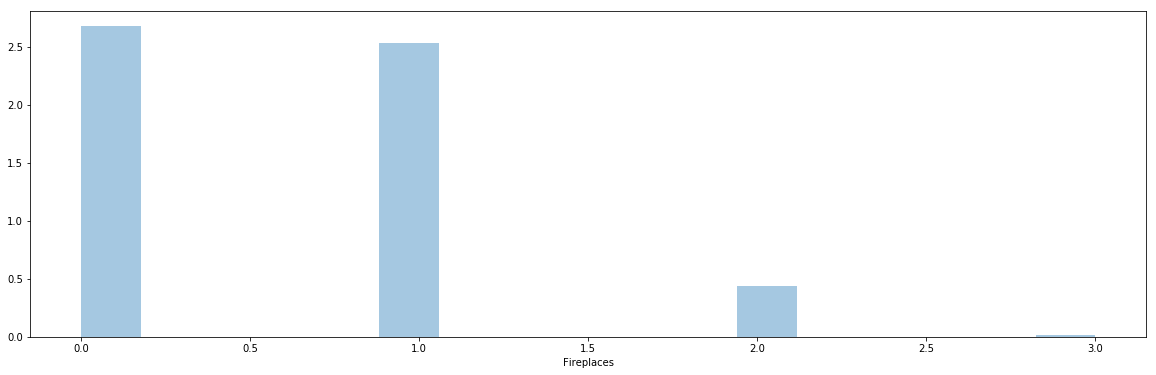

Variable: GarageCars
Mode:  2.0
Median:  2.0
Coefficient of variation:  42.41 %
mean    1.764990
std     0.748728
min     0.000000
25%     1.000000
50%     2.000000
75%     2.000000
max     4.000000
Name: GarageCars, dtype: float64


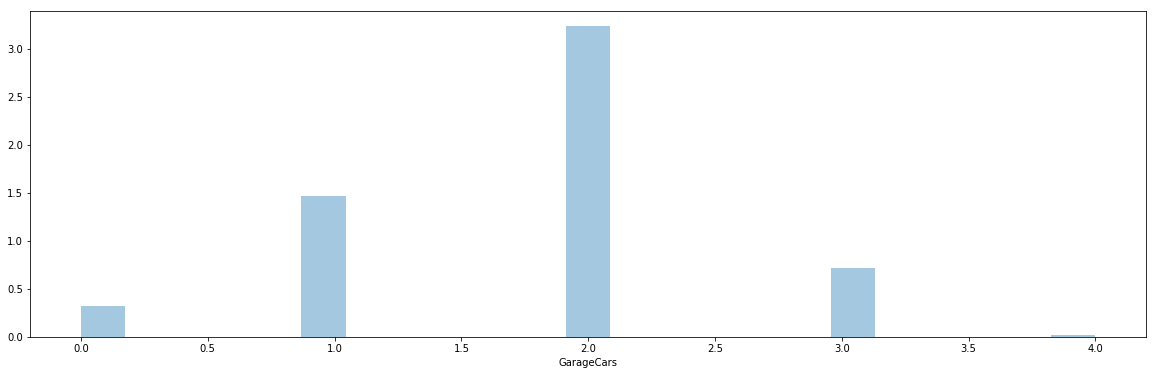

Variable: GarageArea
Mode:  0.0
Median:  478.0
Coefficient of variation:  45.31 %
mean     472.525155
std      214.171752
min        0.000000
25%      327.500000
50%      478.000000
75%      576.000000
max     1418.000000
Name: GarageArea, dtype: float64


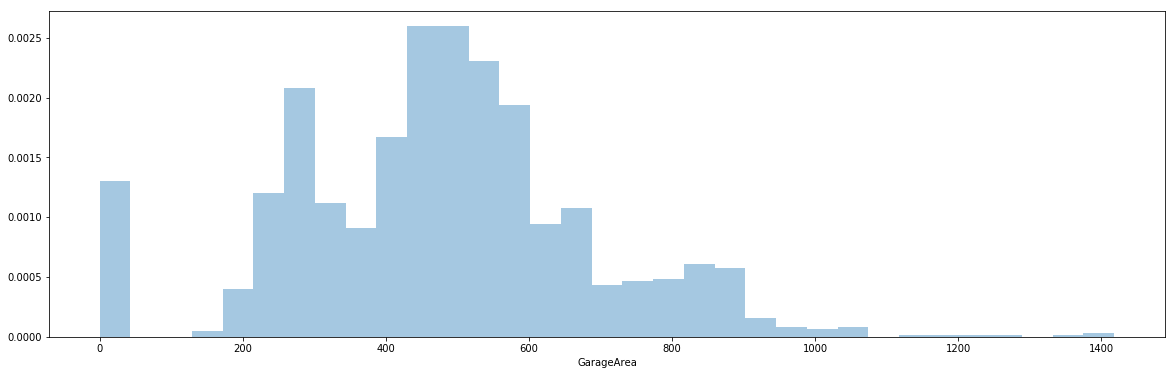

Variable: WoodDeckSF
Mode:  0.0
Median:  0.0
Coefficient of variation:  132.81 %
mean     94.412819
std     125.436852
min       0.000000
25%       0.000000
50%       0.000000
75%     168.000000
max     857.000000
Name: WoodDeckSF, dtype: float64


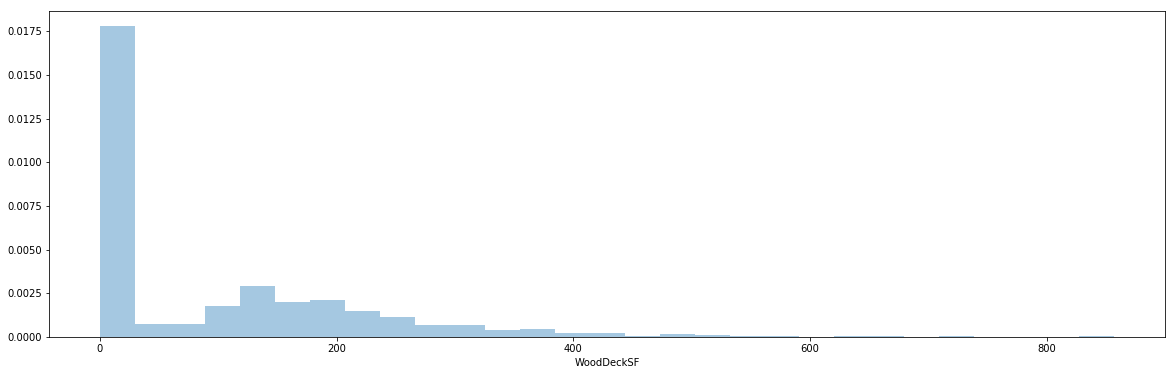

Variable: OpenPorchSF
Mode:  0.0
Median:  24.0
Coefficient of variation:  142.25 %
mean     46.422467
std      66.060150
min       0.000000
25%       0.000000
50%      24.000000
75%      68.000000
max     547.000000
Name: OpenPorchSF, dtype: float64


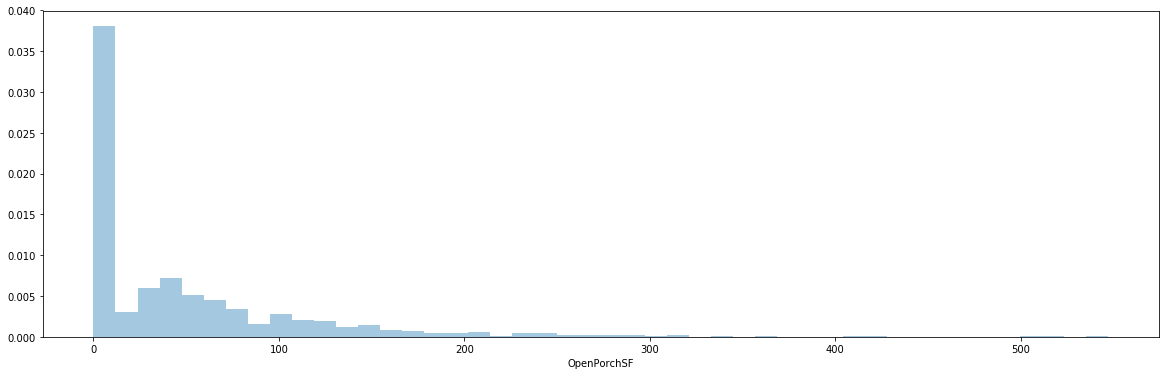

Variable: EnclosedPorch
Mode:  0.0
Median:  0.0
Coefficient of variation:  278.27 %
mean     21.952447
std      61.108223
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max     552.000000
Name: EnclosedPorch, dtype: float64


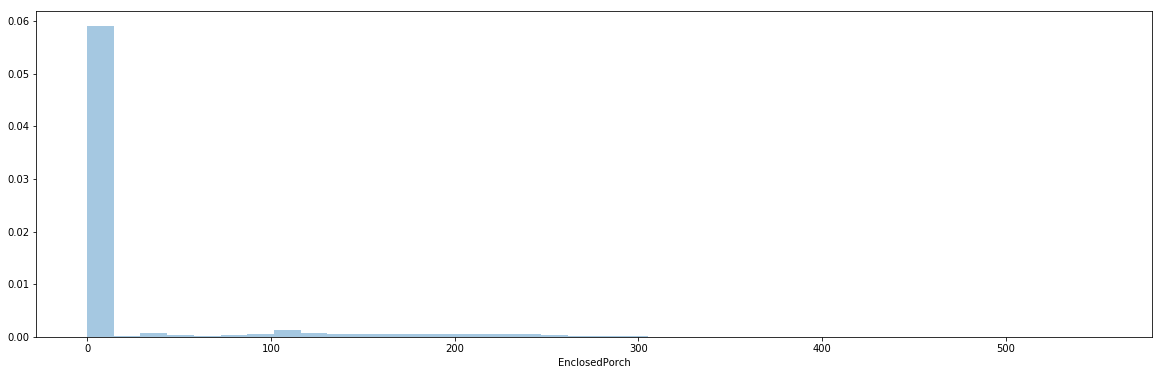

Variable: 3SsnPorch
Mode:  0.0
Median:  0.0
Coefficient of variation:  856.87 %
mean      3.430737
std      29.406940
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max     508.000000
Name: 3SsnPorch, dtype: float64


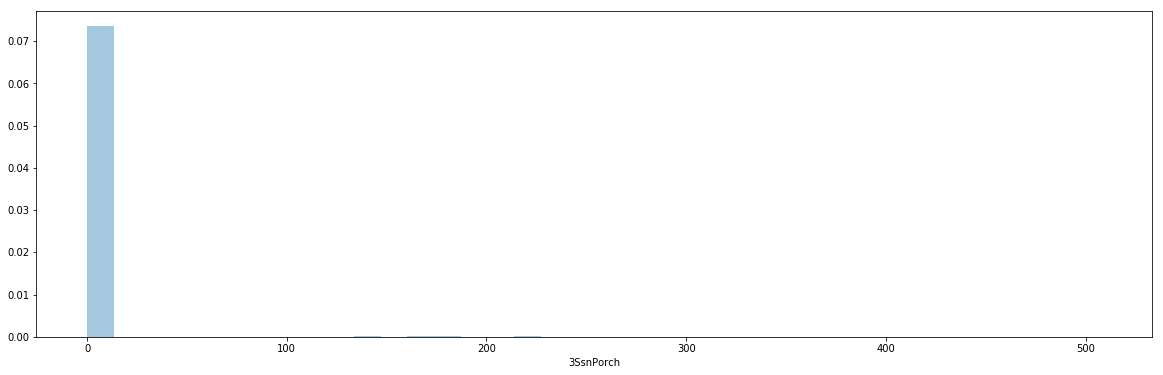

Variable: ScreenPorch
Mode:  0.0
Median:  0.0
Coefficient of variation:  368.86 %
mean     15.154376
std      55.917522
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max     480.000000
Name: ScreenPorch, dtype: float64


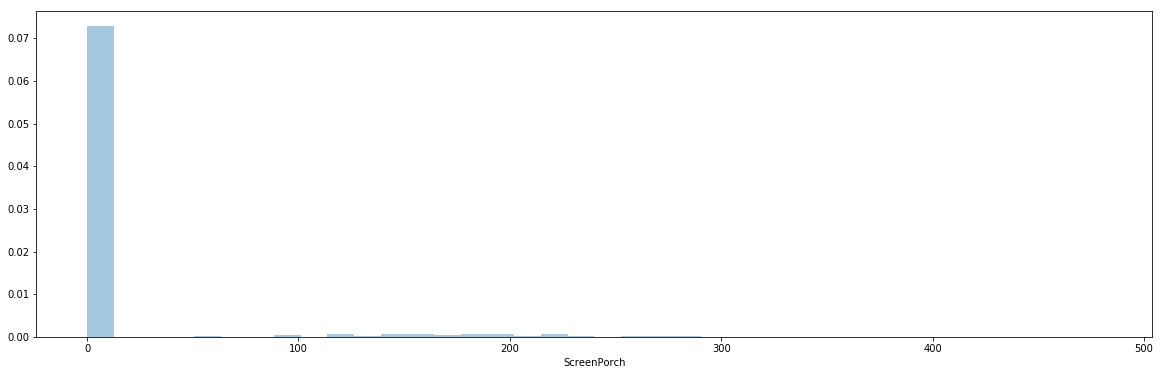

Variable: PoolArea
Mode:  0.0
Median:  0.0
Coefficient of variation:  1451.26 %
mean      2.776017
std      40.301212
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max     738.000000
Name: PoolArea, dtype: float64


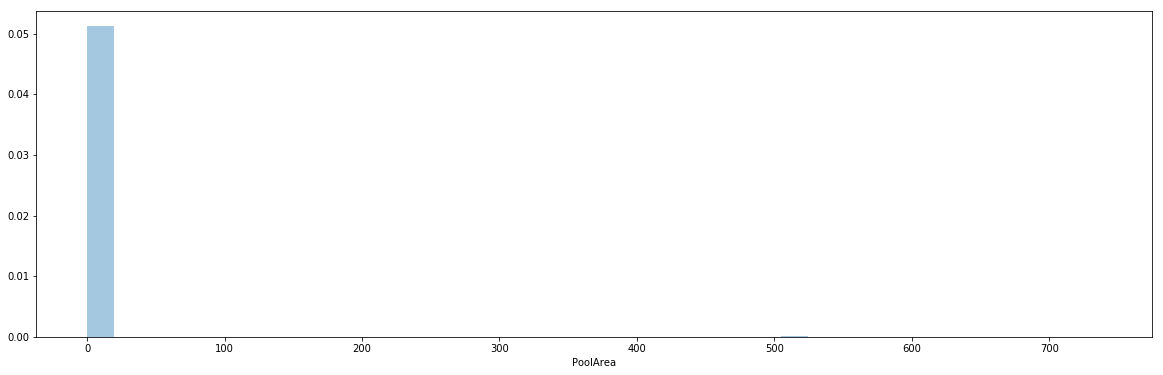

Variable: MiscVal
Mode:  0.0
Median:  0.0
Coefficient of variation:  1136.86 %
mean       43.758787
std       497.648467
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max     15500.000000
Name: MiscVal, dtype: float64


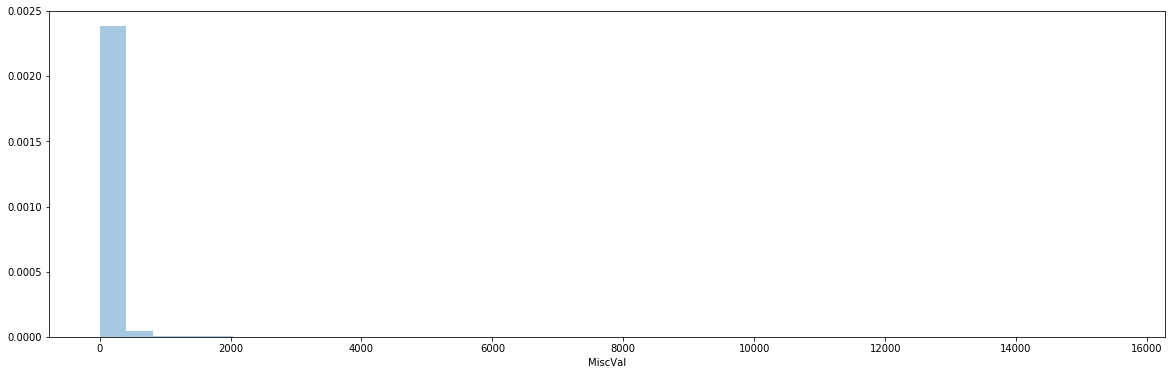

Variable: MoSold
Mode:  6.0
Median:  6.0
Coefficient of variation:  42.72 %
mean     6.319090
std      2.700353
min      1.000000
25%      5.000000
50%      6.000000
75%      8.000000
max     12.000000
Name: MoSold, dtype: float64


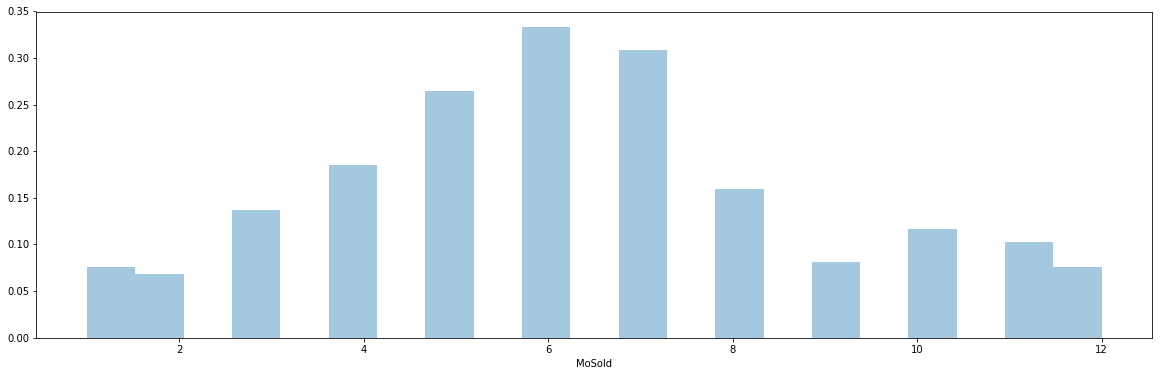

Variable: SalePrice
Mode:  140000.0
Median:  162500.0
Coefficient of variation:  43.89 %
mean    180624.101999
std      79312.128273
min      34900.000000
25%     129900.000000
50%     162500.000000
75%     214000.000000
max     755000.000000
Name: SalePrice, dtype: float64


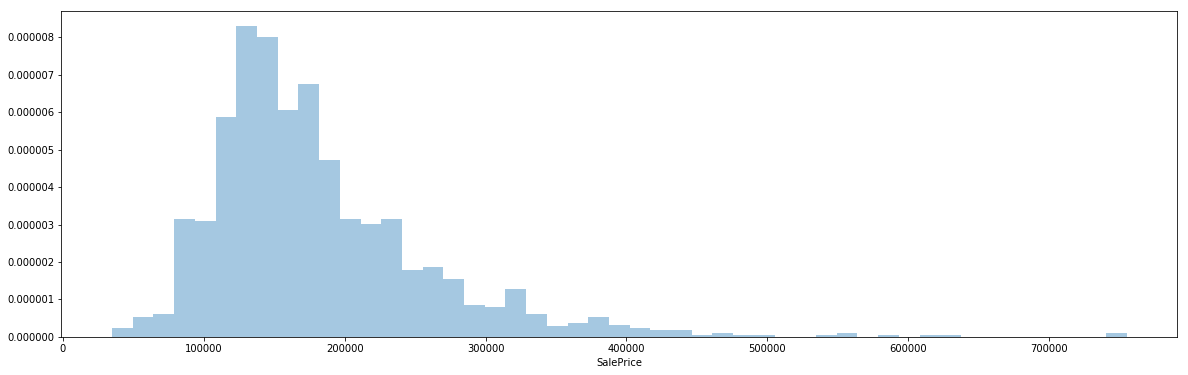

In [21]:
for var in num_variables: 
    print(f'Variable: {var}')
    print('Mode: ',data.mode()[var][0])
    print('Median: ',data[var].median())
    print('Coefficient of variation: ', round((np.std(data[var]) / np.mean(data[var]))*100,2), '%')
    print(data[var].describe()[1:]) #descriptive stats
    f, ax = plt.subplots(figsize=(20, 6))
    vis=sns.distplot(data[var], kde=False, norm_hist=True)
    plt.show()

We will do similar things to time data but we will use line plots to visualize it.

Zmienna GarageYrBlt
Moda:  0.0
mean    1867.914542
std      454.981043
min        0.000000
25%     1958.000000
50%     1977.000000
75%     2001.000000
max     2010.000000
Name: GarageYrBlt, dtype: float64


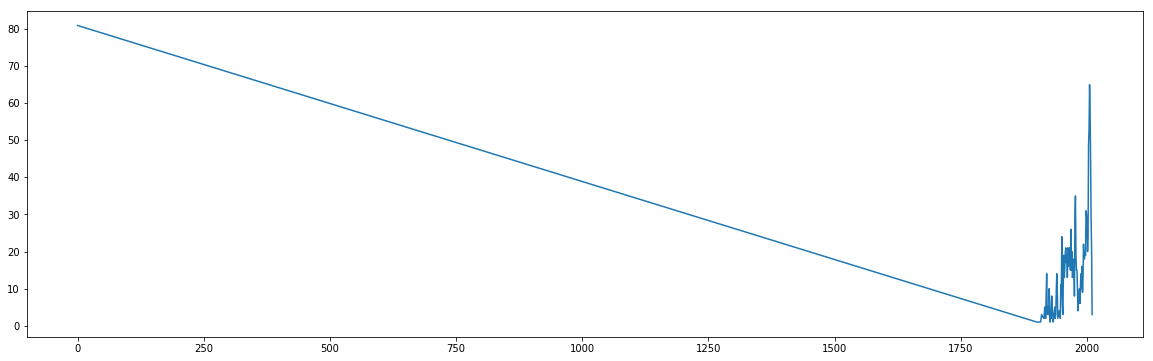

Zmienna YearBuilt
Moda:  2005
mean    1971.092350
std       30.190266
min     1872.000000
25%     1954.000000
50%     1972.000000
75%     2000.000000
max     2010.000000
Name: YearBuilt, dtype: float64


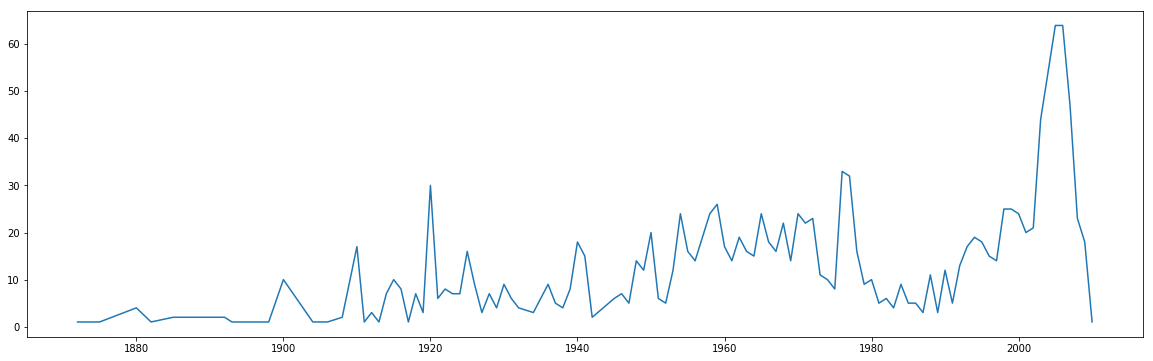

Zmienna YearRemodAdd
Moda:  1950
mean    1984.760165
std       20.651334
min     1950.000000
25%     1966.000000
50%     1993.000000
75%     2004.000000
max     2010.000000
Name: YearRemodAdd, dtype: float64


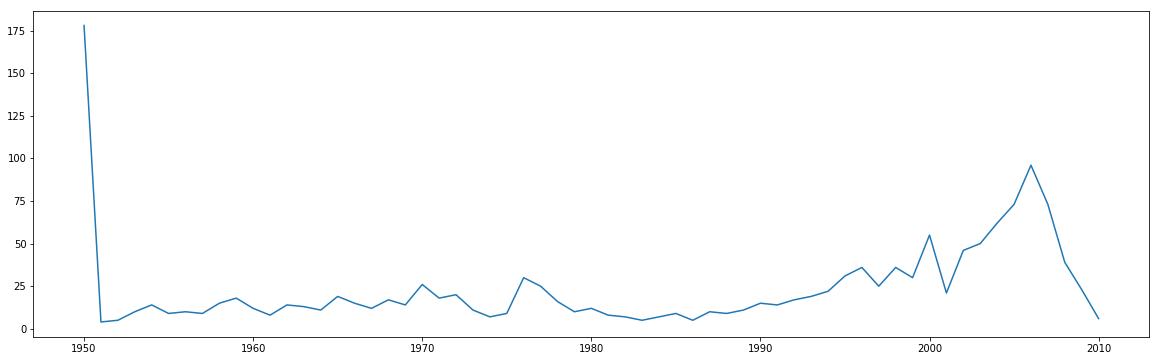

Zmienna YrSold
Moda:  2009
mean    2007.815300
std        1.329376
min     2006.000000
25%     2007.000000
50%     2008.000000
75%     2009.000000
max     2010.000000
Name: YrSold, dtype: float64


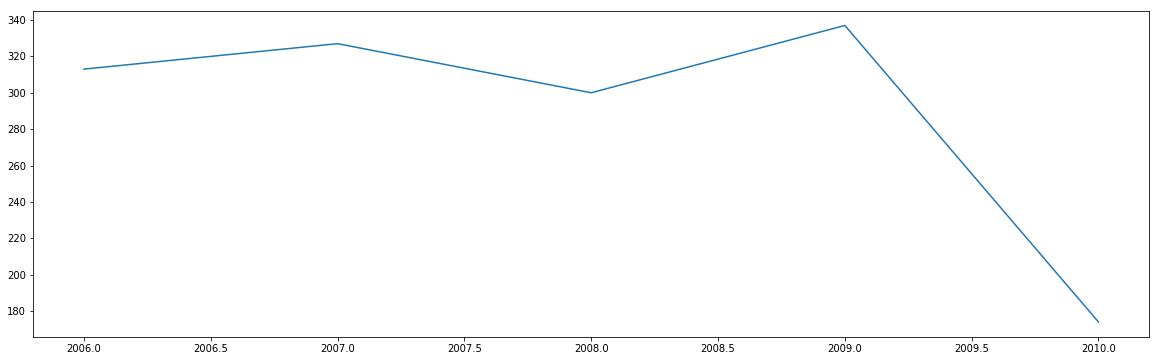

In [47]:
for var in ['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold']:
    print(f'Variable {var}')
    print('Mode: ',data[var].mode()[0])
    print(data[var].describe()[1:])
    f, ax = plt.subplots(figsize=(20, 6))
    vis=sns.lineplot(data=data[var].value_counts())
    plt.show()